<p style="font-family:newtimeroman; font-size:200%; color:#06445e"><b>Udemy Courses Dataset — Exploratory Data Analysis</b></p>

<table style="border:none; font-family:newtimeroman; font-size:105%;">
<tr style="border:none;">
    <td style="border:none; padding:5px 30px 5px 0; vertical-align:top;"><b style="color:#06445e;">Author & Editor:</b></td>
    <td style="border:none; padding:5px 0; vertical-align:top;">A.M Asik Ifthaker Hamim<br><i>Associate AI Engineer, Liberate Labs, Austin, Texas</i></td>
</tr>
<tr style="border:none;">
    <td style="border:none; padding:5px 30px 5px 0; vertical-align:top;"><b style="color:#06445e;">Supervisor:</b></td>
    <td style="border:none; padding:5px 0; vertical-align:top;">MD Kalim Amzad Chy<br><i>Head of AI Innovation, Liberate Labs | Co-founder, Kodevite</i></td>
</tr>
</table>

---

<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>About Data</b></p>

This dataset contains **6,322 Udemy courses** scraped across two major categories: **Bestselling** and **Personal Development**. The data includes course metadata such as pricing, ratings, reviews, duration, instructor information, and topic classifications.

| # | Column | Description |
|---|--------|-------------|
| 1 | `category` | Course category — "Bestselling" or "Personal Development" |
| 2 | `topics` | Pipe-separated topic tags (e.g., "Python \| Data Science") |
| 3 | `topic_count` | Number of topics assigned to the course |
| 4 | `title` | Course title and subtitle |
| 5 | `url` | Udemy course URL |
| 6 | `instructor` | Instructor name(s) |
| 7 | `rating` | Average student rating (1–5 scale) |
| 8 | `reviews_count` | Number of student reviews |
| 9 | `price` | Current discounted price (USD) |
| 10 | `original_price` | Original price before discount (USD) |
| 11 | `duration` | Total video content length (hours) |
| 12 | `lectures` | Number of video lectures |
| 13 | `level` | Target skill level (Beginner, Intermediate, All Levels, Expert) |

<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Task</b></p>

***The task is to perform a comprehensive Exploratory Data Analysis (EDA) on the Udemy Courses dataset. This involves:***

- ***Cleaning and preprocessing raw scraped data (parsing ratings, prices, durations from strings)***
- ***Computing descriptive statistics to understand central tendencies and spread***
- ***Visualizing distributions of key variables (ratings, prices, duration, reviews)***
- ***Detecting outliers and understanding data skewness***
- ***Analyzing relationships between variables (bivariate and correlation analysis)***
- ***Grouping and comparing Bestselling vs Personal Development categories***
- ***Answering 10 key business questions with data-driven insights***

<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Objectives</b></p>

***1. Analyze course pricing, ratings, and engagement patterns across Bestselling and Personal Development categories.***

***2. Identify top-performing topics and the most prolific/highest-rated instructors on the platform.***

***3. Understand the relationships between price, duration, ratings, and student reviews.***

***4. Compare key metrics between Bestselling and Personal Development courses to surface category-level insights.***

***5. Provide actionable insights and recommendations for learners, course creators, and market researchers.***

<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Table of Contents</b></p>

1. [Import Libraries](#section-libraries)
2. [Data Loading and Exploration](#section-loading)
3. [Changing Data Types — Cleaning Raw Strings to Numeric](#section-cleaning)
4. [Descriptive Statistics](#section-descriptive)
5. [Dealing with Missing Values](#section-missing)
6. [Find Duplications and Analyse Them](#section-duplicates)
7. [Feature Engineering](#section-features)
8. [Data Visualization — Univariate Analysis](#section-univariate)
9. [Correlation Analysis](#section-correlation)
10. [Grouping and Aggregation — Bestselling vs Personal Development](#section-grouping)
11. [Questions and Answers](#section-qa)
12. [Outlier Detection](#section-outliers)
13. [Summary](#section-summary)
14. [Conclusion](#section-conclusion)

---

<a id="section-libraries"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Import Libraries</b></p>

We will use the following libraries throughout this analysis:

- ***Pandas*** — Data manipulation and analysis
- ***NumPy*** — Numerical computing
- ***Matplotlib*** — Data visualization (low-level plotting)
- ***Seaborn*** — Statistical data visualization (high-level, built on Matplotlib)
- ***re*** — Regular expressions for parsing messy string data
- ***warnings*** — Suppress non-critical warnings for cleaner output

In [ ]:
#pip install pandas numpy matplotlib seaborn 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
TEAL = '#06445e'
GREEN = '#2ecc71'
print("Libraries imported successfully!")

Libraries imported successfully!


---
<a id="section-loading"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Data Loading and Exploration | Cleaning</b></p>

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Load the CSV file and create a DataFrame</p>

***Let's start by loading our dataset and setting pandas to display all columns so we don't miss any information.***

In [4]:
df = pd.read_csv('udemy_courses_unique.csv')
pd.set_option('display.max_columns', None)

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Get a sneak peek of the data</p>

***Let's look at the first 5 rows to understand the structure and format of our raw data.***

In [5]:
df.head()

,category,topics,topic_count,title,url,instructor,rating,reviews_count,price,original_price,duration,lectures,level
0,Bestselling,3D Game Development | C Sharp | Game Developme...,4,Complete C# Unity 3D Game Development in Unity...,https://www.udemy.com/course/unitycourse2/,"Rick Davidson, GameDev.tv Team, Stephen Hubbard",Rating: 4.7 out of 54.7,"47,765",$9.99,Original Price$64.99,27 total hours,192 lectures,All Levels
1,Bestselling,Angular | Aspnet Core | C Sharp,3,"ASP NET Core,MVC,C#,Angular, ChatGPT & EF Cras...",https://www.udemy.com/course/aspnet-core-aspne...,Devwebtuts 24/7,Rating: 4.0 out of 54.0,"2,088",$13.99,Original Price$64.99,22.5 total hours,262 lectures,All Levels
2,Bestselling,Algorithms | Data Structures | Java,3,Algorithms Data Structures in Java #1 (+INTERV...,https://www.udemy.com/course/algorithms-and-da...,Holczer Balazs,Rating: 4.6 out of 54.6,"3,160",$11.99,Original Price$79.99,22 total hours,184 lectures,All Levels
3,Bestselling,Algorithms | C Sharp | Data Structures,3,Algorithms and Data Structures in C#: Complete...,https://www.udemy.com/course/algorithms-data-s...,Engineer Spock,Rating: 4.4 out of 54.4,"2,224",$11.99,Original Price$64.99,18.5 total hours,168 lectures,All Levels
4,Bestselling,Amazon Aws | Aws Certified Developer Associate...,3,Amazon Web Services (AWS) Certified - 5 Certif...,https://www.udemy.com/course/aws-certified-ass...,"BackSpace Academy, Paul Coady",Rating: 4.6 out of 54.6,"25,001",$10.99,Original Price$74.99,54.5 total hours,218 lectures,All Levels


<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Let's have a look at the shape of the dataset</p>

In [6]:
print(f"The Number of Rows are {df.shape[0]}, and Columns are {df.shape[1]}.")

The Number of Rows are 6322, and Columns are 13.


<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Let's have a look at the columns and their data types</p>

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6322 entries, 0 to 6321
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   category        6322 non-null   str  
 1   topics          6322 non-null   str  
 2   topic_count     6322 non-null   int64
 3   title           6322 non-null   str  
 4   url             6322 non-null   str  
 5   instructor      6322 non-null   str  
 6   rating          6296 non-null   str  
 7   reviews_count   6296 non-null   str  
 8   price           6263 non-null   str  
 9   original_price  3515 non-null   str  
 10  duration        6058 non-null   str  
 11  lectures        6092 non-null   str  
 12  level           6322 non-null   str  
dtypes: int64(1), str(12)
memory usage: 642.2 KB


In [8]:
df.isnull().sum()

category             0
topics               0
topic_count          0
title                0
url                  0
instructor           0
rating              26
reviews_count       26
price               59
original_price    2807
duration           264
lectures           230
level                0
dtype: int64

<p style="font-family:newtimeroman; font-size:120%; color:#06445e"><b>Observation Set 1 — Data Loading & Initial Exploration</b></p>

- ***The dataset contains 6,322 rows and 13 columns, representing a substantial sample of Udemy courses across two major categories.***
- ***Almost all columns are of `object` (string) type — this is because the data was web-scraped and contains embedded formatting characters ($, commas, "Rating: X out of 5", "X total hours", etc.). This is a common challenge with scraped datasets and necessitates thorough cleaning before any numerical analysis.***
- ***Key columns that need type conversion: `rating`, `reviews_count`, `price`, `original_price`, `duration`, `lectures`, and `topic_count`. Without proper parsing, any aggregation or statistical computation on these columns would fail or produce incorrect results.***
- ***Missing values are present in 6 columns: `original_price` has the most missing values (2,807 or ~44.4%), followed by `duration` (264, ~4.2%), `lectures` (230, ~3.6%), `price` (59, ~0.9%), and both `rating` and `reviews_count` (26 each, ~0.4%). The high missing rate for `original_price` is expected since free courses and courses without active discounts do not display an original price.***
- ***The `title` column contains both the course name and description concatenated together, which is typical of how Udemy structures course metadata in their page source.***
- ***No missing values exist for `category`, `topics`, `topic_count`, `title`, `url`, `instructor`, or `level` — these are core structural fields that are always present on a Udemy course page.***

---
<a id="section-cleaning"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Changing Data Types — Cleaning Raw Strings to Numeric</b></p>

***Since all columns came in as object (string) type from web scraping, we need to parse and convert the numeric columns. Each column has a different format that needs specific handling:***

- ***`rating`: Contains "Rating: 4.7 out of 54.7" or plain "4.5"***
- ***`reviews_count`: Contains commas like "47,765"***
- ***`price`: Contains dollar sign like "$9.99"***
- ***`original_price`: Contains "Original Price$64.99" or is empty***
- ***`duration`: Contains "27 total hours" or "1 total hour"***
- ***`lectures`: Contains "192 lectures"***

In [9]:
# Clean 'rating' column
# Format examples: "Rating: 4.7 out of 54.7", "4.5", or empty
def parse_rating(val):
    if pd.isna(val) or str(val).strip() == '':
        return np.nan
    match = re.search(r'(\d+\.?\d*)', str(val))
    return float(match.group(1)) if match else np.nan

df['rating'] = df['rating'].apply(parse_rating)
print("Rating column cleaned.")
print(f"Sample values: {df['rating'].dropna().head().tolist()}")

Rating column cleaned.
Sample values: [4.7, 4.0, 4.6, 4.4, 4.6]


In [10]:
# Clean 'reviews_count' column
# Format example: "47,765" -> 47765
df['reviews_count'] = df['reviews_count'].astype(str).str.replace(',', '', regex=False).str.replace('"', '', regex=False).str.strip()
df['reviews_count'] = pd.to_numeric(df['reviews_count'], errors='coerce')
print("Reviews count column cleaned.")
print(f"Sample values: {df['reviews_count'].dropna().head().tolist()}")

Reviews count column cleaned.
Sample values: [47765.0, 2088.0, 3160.0, 2224.0, 25001.0]


In [11]:
# Clean 'price' column
# Format example: "$9.99" -> 9.99
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Clean 'original_price' column
# Format example: "Original Price$64.99" -> 64.99, or empty
def parse_original_price(val):
    if pd.isna(val) or str(val).strip() == '' or str(val).strip() == 'nan':
        return np.nan
    match = re.search(r'(\d+\.?\d*)', str(val))
    return float(match.group(1)) if match else np.nan

df['original_price'] = df['original_price'].apply(parse_original_price)
print("Price columns cleaned.")
print(f"Price sample: {df['price'].dropna().head().tolist()}")
print(f"Original price sample: {df['original_price'].dropna().head().tolist()}")

Price columns cleaned.
Price sample: [9.99, 13.99, 11.99, 11.99, 10.99]
Original price sample: [64.99, 64.99, 79.99, 64.99, 74.99]


In [12]:
# Clean 'duration' column
# Format examples: "27 total hours", "1 total hour", "0.5 total hours"
def parse_duration(val):
    if pd.isna(val) or str(val).strip() == '' or str(val).strip() == 'nan':
        return np.nan
    match = re.search(r'(\d+\.?\d*)', str(val))
    return float(match.group(1)) if match else np.nan

df['duration'] = df['duration'].apply(parse_duration)

# Clean 'lectures' column
# Format example: "192 lectures"
def parse_lectures(val):
    if pd.isna(val) or str(val).strip() == '' or str(val).strip() == 'nan':
        return np.nan
    match = re.search(r'(\d+)', str(val))
    return int(match.group(1)) if match else np.nan

df['lectures'] = df['lectures'].apply(parse_lectures).astype('Int64')

print("Duration and Lectures columns cleaned.")
print(f"Duration sample: {df['duration'].dropna().head().tolist()}")
print(f"Lectures sample: {df['lectures'].dropna().head().tolist()}")

Duration and Lectures columns cleaned.
Duration sample: [27.0, 22.5, 22.0, 18.5, 54.5]
Lectures sample: [192, 262, 184, 168, 218]


In [13]:
# Convert 'topic_count' to numeric
df['topic_count'] = pd.to_numeric(df['topic_count'], errors='coerce')
print("Topic count column cleaned.")

Topic count column cleaned.


In [14]:
# Verify all data types after cleaning
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6322 entries, 0 to 6321
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        6322 non-null   str    
 1   topics          6322 non-null   str    
 2   topic_count     6322 non-null   int64  
 3   title           6322 non-null   str    
 4   url             6322 non-null   str    
 5   instructor      6322 non-null   str    
 6   rating          6296 non-null   float64
 7   reviews_count   6296 non-null   float64
 8   price           6263 non-null   float64
 9   original_price  3515 non-null   float64
 10  duration        6058 non-null   float64
 11  lectures        6092 non-null   Int64  
 12  level           6322 non-null   str    
dtypes: Int64(1), float64(5), int64(1), str(6)
memory usage: 648.4 KB


In [15]:
df.head()

,category,topics,topic_count,title,url,instructor,rating,reviews_count,price,original_price,duration,lectures,level
0,Bestselling,3D Game Development | C Sharp | Game Developme...,4,Complete C# Unity 3D Game Development in Unity...,https://www.udemy.com/course/unitycourse2/,"Rick Davidson, GameDev.tv Team, Stephen Hubbard",4.7,47765.0,9.99,64.99,27.0,192,All Levels
1,Bestselling,Angular | Aspnet Core | C Sharp,3,"ASP NET Core,MVC,C#,Angular, ChatGPT & EF Cras...",https://www.udemy.com/course/aspnet-core-aspne...,Devwebtuts 24/7,4.0,2088.0,13.99,64.99,22.5,262,All Levels
2,Bestselling,Algorithms | Data Structures | Java,3,Algorithms Data Structures in Java #1 (+INTERV...,https://www.udemy.com/course/algorithms-and-da...,Holczer Balazs,4.6,3160.0,11.99,79.99,22.0,184,All Levels
3,Bestselling,Algorithms | C Sharp | Data Structures,3,Algorithms and Data Structures in C#: Complete...,https://www.udemy.com/course/algorithms-data-s...,Engineer Spock,4.4,2224.0,11.99,64.99,18.5,168,All Levels
4,Bestselling,Amazon Aws | Aws Certified Developer Associate...,3,Amazon Web Services (AWS) Certified - 5 Certif...,https://www.udemy.com/course/aws-certified-ass...,"BackSpace Academy, Paul Coady",4.6,25001.0,10.99,74.99,54.5,218,All Levels


<p style="font-family:newtimeroman; font-size:120%; color:#06445e"><b>Observation Set 2 — Data Type Conversion & Cleaning</b></p>

- ***Successfully converted 7 columns from object to appropriate numeric types: `rating` (float64), `reviews_count` (float64), `price` (float64), `original_price` (float64), `duration` (float64), `lectures` (Int64 — nullable integer), and `topic_count` (int64).***
- ***Rating parsing handled multiple formats (e.g., "Rating: 4.7 out of 54.7", plain "4.5") using regex extraction. Sample cleaned values: [4.7, 4.0, 4.6, 4.4, 4.6] confirm correct parsing.***
- ***Reviews count was cleaned by removing commas and quotes. Sample values: [47,765, 2,088, 3,160, 2,224, 25,001] — these are whole numbers as expected for review counts.***
- ***Price was cleaned by stripping dollar signs. Sample values: [$9.99, $13.99, $11.99] confirm the data is now in numeric form suitable for statistical analysis.***
- ***Original price required specialized parsing to handle the "Original Price$64.99" format. Sample values: [$64.99, $64.99, $79.99, $64.99, $74.99].***
- ***Duration was parsed from strings like "27 total hours" to float values. Sample values: [27.0, 22.5, 22.0, 18.5, 54.5] hours.***
- ***Lectures was parsed from strings and converted to nullable integers. Sample values: [192, 262, 184, 168, 218].***
- ***Some values could not be parsed and became NaN — this is expected for missing or malformed entries from web scraping and is handled appropriately in subsequent analysis.***
- ***The dataset now has a clean mix of 6 numeric columns (for quantitative analysis) and 6 categorical/text columns (category, topics, title, instructor, level, url) ready for exploration.***

---
<a id="section-descriptive"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Descriptive Statistics</b></p>

***Descriptive statistics provide a summary of the central tendency, dispersion, and shape of a dataset's distribution. Let's examine both numeric and categorical columns.***

In [16]:
df.describe()

,topic_count,rating,reviews_count,price,original_price,duration,lectures
count,6322.000000,6296.000000,6296.000000,6263.000000,3515.000000,6058.000000,6092.0
mean,1.068807,4.451874,4377.347522,24.627873,50.369516,76.245378,81.607846
std,0.280988,0.321617,19342.437947,24.890641,22.366633,3681.407632,107.042485
min,1.000000,1.000000,1.000000,9.990000,19.990000,0.500000,5.0
25%,1.000000,4.300000,120.000000,10.990000,22.990000,2.000000,23.0
50%,1.000000,4.500000,541.500000,11.990000,54.990000,4.500000,44.0
75%,1.000000,4.600000,2190.000000,24.990000,69.990000,10.500000,93.0
max,4.000000,5.000000,555632.000000,199.990000,174.990000,202644.500000,800.0


In [17]:
df.describe(include='object')

,category,topics,title,url,instructor,level
count,6322,6322,6322,6322,6322,6322
unique,2,414,6319,6322,3632,4
top,Bestselling,Ethical Hacking,HTML & CSS - Certification Course for Beginner...,https://www.udemy.com/course/unitycourse2/,Alex Genadinik,All Levels
freq,3627,46,2,1,34,3972


<p style="font-family:newtimeroman; font-size:120%; color:#06445e"><b>Observation Set 3 — Descriptive Statistics</b></p>

**Numeric Variables:**
- ***The average course rating is approximately 4.45/5.0 (median: 4.5), indicating that Udemy courses are generally well-received. The standard deviation of 0.32 shows relatively tight clustering around the mean, with ratings ranging from 1.0 to 5.0.***
- ***The average price is $24.63 but the median is only $11.99 — this large gap (mean > 2x median) reveals a strong right skew, indicating that most courses are budget-priced while a few premium courses pull the average up. Prices range from $9.99 to $199.99.***
- ***Reviews count has an extremely high standard deviation (19,342) relative to the mean (4,377), with a median of only 541.5. This indicates a power-law distribution where a few courses dominate engagement. The maximum of 555,632 reviews is ~127x the mean.***
- ***Original price averages $50.37 (median: $54.99) with a range of $19.99–$174.99, suggesting that Udemy courses are typically listed at a moderate original price before discounts.***
- ***Course duration has a mean of 76.2 hours but a median of only 4.5 hours, indicating extreme right skew with some data quality issues (max: 202,644.5 hours is clearly a parsing anomaly). Most courses are short-to-medium length.***
- ***Topic count has a mean of ~1.07, showing that the vast majority of courses are tagged with exactly 1 topic (25th, 50th, and 75th percentiles are all 1.0), with a maximum of 4 topics.***

**Categorical Variables:**
- ***There are 2 categories: "Bestselling" (3,627 courses, 57.4%) and "Personal Development" (2,695 courses, 42.6%).***
- ***414 unique topic combinations exist across all courses, with "Ethical Hacking" being the single most common topic (46 courses).***
- ***3,632 unique instructors are represented, demonstrating a highly diverse instructor base with very few repeat instructors in the dataset.***
- ***The `level` column has 4 unique values, with "All Levels" being the most frequent category.***

---
<a id="section-missing"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Dealing with Missing Values</b></p>

***Missing values can significantly impact the quality of our analysis. They can lead to biased estimates, reduced statistical power, and incorrect conclusions. Let's identify and handle them appropriately.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Missing Values</p>

In [18]:
# Count and percentage of missing values
missing = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': round(df.isnull().sum() / len(df) * 100, 2)
}).sort_values('Missing %', ascending=False)
missing[missing['Missing Count'] > 0]

,Missing Count,Missing %
original_price,2807,44.40
duration,264,4.18
lectures,230,3.64
price,59,0.93
rating,26,0.41
reviews_count,26,0.41


<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Let's plot the missing values</p>

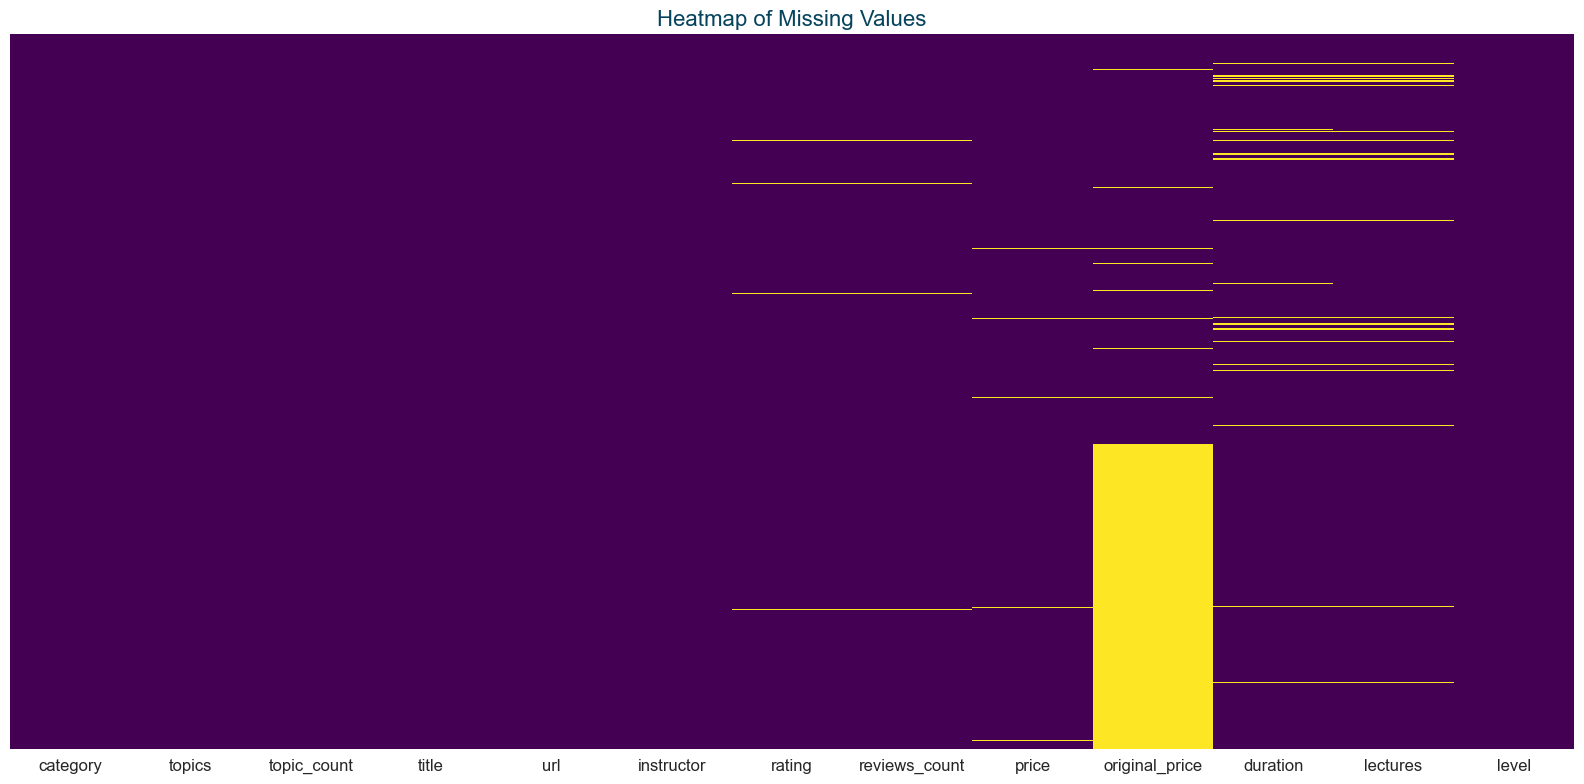

In [19]:
# VIZ 1: Heatmap of Missing Values
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values', fontsize=16, color=TEAL)
plt.tight_layout()
plt.show()

***Figure 1: Heatmap of Missing Values — Yellow lines indicate missing data. We can see that `original_price` has the most missing values, while other columns have relatively few.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Let's plot the missing values by percentage</p>

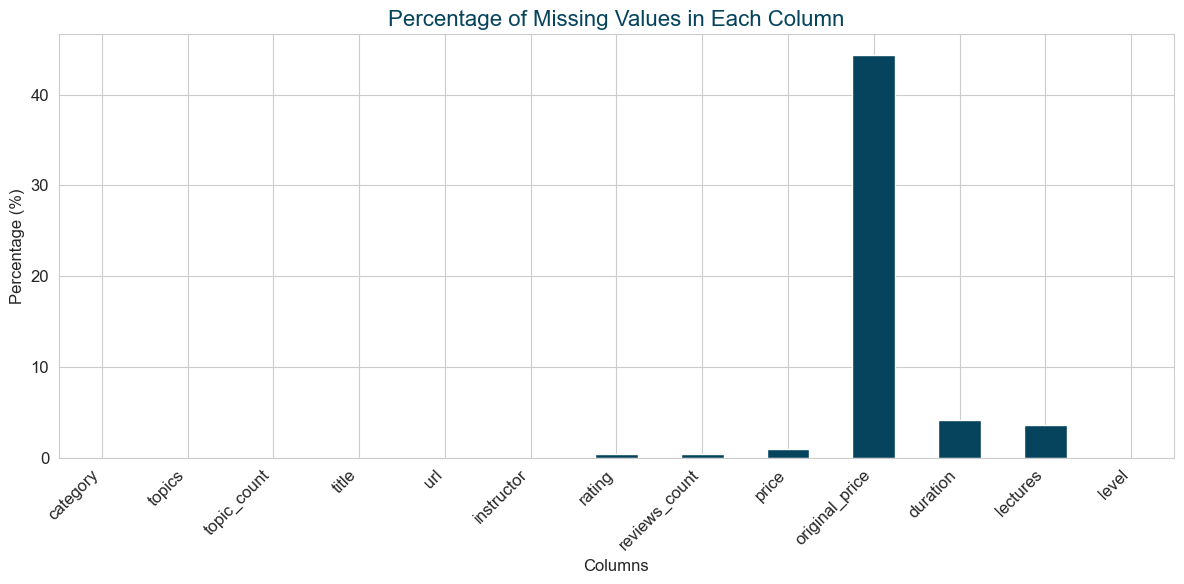

In [20]:
# VIZ 2: Bar chart of Missing Value Percentages
plt.figure(figsize=(12, 6))
missing_pct = df.isnull().sum() / len(df) * 100
colors = [TEAL if x > 0 else '#cccccc' for x in missing_pct]
missing_pct.plot(kind='bar', color=colors, edgecolor='white')
plt.title('Percentage of Missing Values in Each Column', fontsize=16, color=TEAL)
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***Figure 2: Percentage of null values per column. `original_price` has the highest missing rate because not all courses display their original price (especially free courses or courses without discounts).***

In [21]:
# Handle missing values
# Median imputation for rating and reviews_count (low missing %)
df['rating'] = df['rating'].fillna(df['rating'].median())
df['reviews_count'] = df['reviews_count'].fillna(df['reviews_count'].median())

# original_price — leave as NaN (not all courses show original price, this is expected)
# price — fill with 0 where missing (likely free courses)
df['price'] = df['price'].fillna(0)

# Verify
print("Missing values after imputation:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values after imputation:
original_price    2807
duration           264
lectures           230
topics               0
category             0
url                  0
title                0
topic_count          0
instructor           0
price                0
reviews_count        0
rating               0
level                0
dtype: int64



***Rating and reviews_count were imputed with median values. Original price NaNs are kept as-is since not all courses have a listed original price. Missing prices were set to 0 (assumed free).***

---
<a id="section-duplicates"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Find Duplications and Analyse Them</b></p>

***Duplicate records can skew our analysis by over-representing certain courses. Since a course can appear in multiple topics, we check duplicates by URL (unique identifier for each course).***

In [22]:
print(f"Exact duplicate rows: {df.duplicated().sum()}")
print(f"Duplicate URLs: {df.duplicated(subset=['url']).sum()}")

Exact duplicate rows: 0
Duplicate URLs: 0


In [23]:
# Drop URL-based duplicates if any exist, keeping first occurrence
initial_count = len(df)
df = df.drop_duplicates(subset=['url']).reset_index(drop=True)
print(f"Rows before: {initial_count}")
print(f"Rows after: {len(df)}")
print(f"Removed: {initial_count - len(df)} duplicate(s)")

Rows before: 6322
Rows after: 6322
Removed: 0 duplicate(s)


---
<a id="section-features"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Feature Engineering</b></p>

***Let's create new derived columns that will help us gain deeper insights:***

- ***`discount_pct` — The percentage discount from original to current price***
- ***`price_per_hour` — Cost per hour of content (value metric)***
- ***`avg_lecture_mins` — Average length of each lecture in minutes***
- ***`estimated_revenue` — A proxy for course revenue (reviews × price)***
- ***Exploded topics DataFrame for topic-level analysis***

In [24]:
# Calculate discount percentage
df['discount_pct'] = ((df['original_price'] - df['price']) / df['original_price'] * 100).round(2)

# Price per hour of content
df['price_per_hour'] = (df['price'] / df['duration']).round(2)
df['price_per_hour'] = df['price_per_hour'].replace([np.inf, -np.inf], np.nan)

# Average lecture length in minutes
df['avg_lecture_mins'] = ((df['duration'] * 60) / df['lectures']).round(2)
df['avg_lecture_mins'] = df['avg_lecture_mins'].replace([np.inf, -np.inf], np.nan)

# Estimated revenue proxy
df['estimated_revenue'] = (df['reviews_count'] * df['price']).round(2)

print("New features created:")
print(df[['price', 'original_price', 'discount_pct', 'price_per_hour', 'avg_lecture_mins', 'estimated_revenue']].head(10))

New features created:
   price  original_price  discount_pct  price_per_hour  avg_lecture_mins  \
0   9.99           64.99         84.63            0.37              8.44   
1  13.99           64.99         78.47            0.62              5.15   
2  11.99           79.99         85.01            0.55              7.17   
3  11.99           64.99         81.55            0.65              6.61   
4  10.99           74.99         85.34            0.20              15.0   
5   9.99           64.99         84.63            0.23              6.88   
6   9.99           64.99         84.63            0.28              7.86   
7  10.99           69.99         84.30            0.96              6.33   
8  10.99           74.99         85.34            0.26              6.68   
9  10.99           74.99         85.34            0.52              8.34   

   estimated_revenue  
0          477172.35  
1           29211.12  
2           37888.40  
3           26665.76  
4          274760.99  
5  

In [25]:
# Create exploded topics DataFrame for topic-level analysis
df_topics = df.assign(topic=df['topics'].str.split(' \| ')).explode('topic').reset_index(drop=True)
df_topics['topic'] = df_topics['topic'].str.strip()
print(f"Original DataFrame: {len(df)} rows")
print(f"Exploded Topics DataFrame: {len(df_topics)} rows")
print(f"Unique topics: {df_topics['topic'].nunique()}")

Original DataFrame: 6322 rows
Exploded Topics DataFrame: 6757 rows
Unique topics: 182


In [26]:
df.head()

,category,topics,topic_count,title,url,instructor,rating,reviews_count,price,original_price,duration,lectures,level,discount_pct,price_per_hour,avg_lecture_mins,estimated_revenue
0,Bestselling,3D Game Development | C Sharp | Game Developme...,4,Complete C# Unity 3D Game Development in Unity...,https://www.udemy.com/course/unitycourse2/,"Rick Davidson, GameDev.tv Team, Stephen Hubbard",4.7,47765.0,9.99,64.99,27.0,192,All Levels,84.63,0.37,8.44,477172.35
1,Bestselling,Angular | Aspnet Core | C Sharp,3,"ASP NET Core,MVC,C#,Angular, ChatGPT & EF Cras...",https://www.udemy.com/course/aspnet-core-aspne...,Devwebtuts 24/7,4.0,2088.0,13.99,64.99,22.5,262,All Levels,78.47,0.62,5.15,29211.12
2,Bestselling,Algorithms | Data Structures | Java,3,Algorithms Data Structures in Java #1 (+INTERV...,https://www.udemy.com/course/algorithms-and-da...,Holczer Balazs,4.6,3160.0,11.99,79.99,22.0,184,All Levels,85.01,0.55,7.17,37888.40
3,Bestselling,Algorithms | C Sharp | Data Structures,3,Algorithms and Data Structures in C#: Complete...,https://www.udemy.com/course/algorithms-data-s...,Engineer Spock,4.4,2224.0,11.99,64.99,18.5,168,All Levels,81.55,0.65,6.61,26665.76
4,Bestselling,Amazon Aws | Aws Certified Developer Associate...,3,Amazon Web Services (AWS) Certified - 5 Certif...,https://www.udemy.com/course/aws-certified-ass...,"BackSpace Academy, Paul Coady",4.6,25001.0,10.99,74.99,54.5,218,All Levels,85.34,0.20,15.0,274760.99


<p style="font-family:newtimeroman; font-size:120%; color:#06445e"><b>Observation Set 4 — Feature Engineering</b></p>

- ***`discount_pct`: Shows how much discount each course offers. Courses without an original price have NaN discount. Sample values show discounts of 78–85%, confirming Udemy's well-known deep-discount pricing strategy where courses are listed at high original prices but sold at steep discounts.***
- ***`price_per_hour`: Measures cost efficiency — lower values mean more content per dollar. Sample values range from $0.20 to $0.65 per hour, indicating that Udemy courses are generally very cost-effective compared to traditional education. This metric helps learners identify courses that offer the most content for their investment.***
- ***`avg_lecture_mins`: Shows content density per lecture — sample values range from ~5 to 15 minutes per lecture. Shorter lectures (~5–8 min) suggest bite-sized, modular learning design, while longer lectures (~15 min) indicate more in-depth coverage per session. This is useful for understanding different instructional approaches.***
- ***`estimated_revenue`: A rough proxy for course commercial success (reviews × price). While not representing actual revenue (which depends on total purchases, refunds, and Udemy's revenue share), it provides a useful ranking mechanism for identifying commercially successful courses.***
- ***The exploded topics DataFrame expanded the dataset from 6,322 rows to 6,757 rows (a ~6.9% increase), revealing 182 unique individual topics. This means many courses are tagged with multiple topics, enabling topic-level analysis that wouldn't be possible with the pipe-separated format.***

---
<a id="section-univariate"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Data Visualization — Univariate Analysis</b></p>

***Univariate analysis examines each variable individually to understand its distribution, central tendency and spread. This is the foundation for all further analysis.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Category Distribution (Bestselling vs Personal Development)</p>

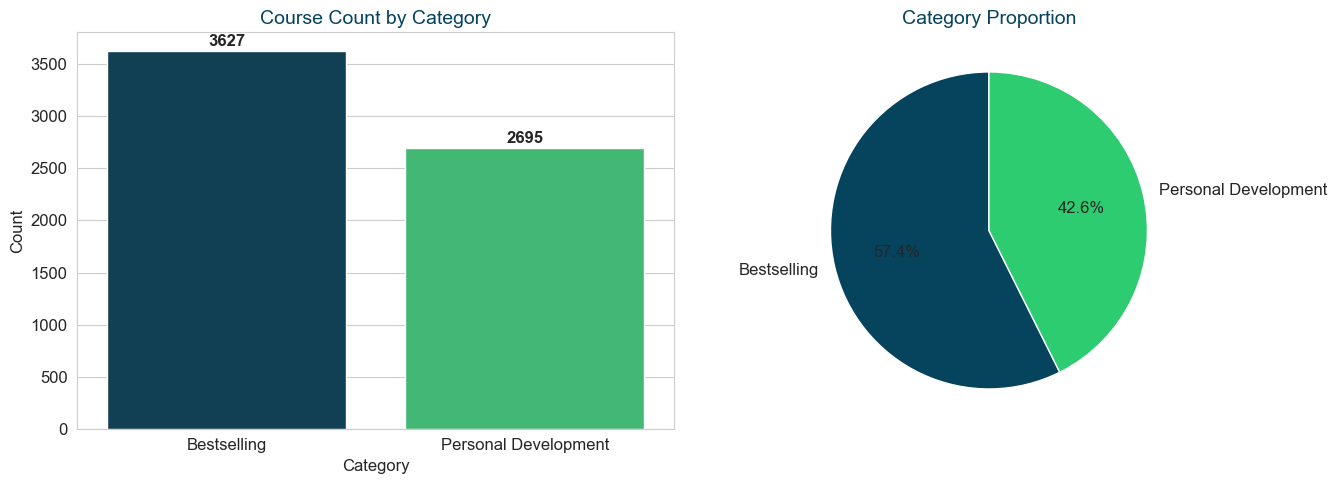

In [27]:
# VIZ 3: Category Distribution — Countplot + Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Countplot
cat_counts = df['category'].value_counts()
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette=[TEAL, GREEN], ax=axes[0])
axes[0].set_title('Course Count by Category', fontsize=14, color=TEAL)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
for i, v in enumerate(cat_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie Chart
axes[1].pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%',
            colors=[TEAL, GREEN], startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Category Proportion', fontsize=14, color=TEAL)

plt.tight_layout()
plt.show()

***Figure 3: Category Distribution — The dataset contains 3,627 Bestselling courses (57.4%) and 2,695 Personal Development courses (42.6%). While not perfectly balanced, the split provides a solid basis for comparative analysis between the two categories. The Bestselling category has ~35% more courses, which is expected since it represents a broader range of topics (technology, business, etc.) compared to the more focused Personal Development category. This near 60/40 split ensures neither category is underrepresented in our analysis.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Course Level Distribution</p>

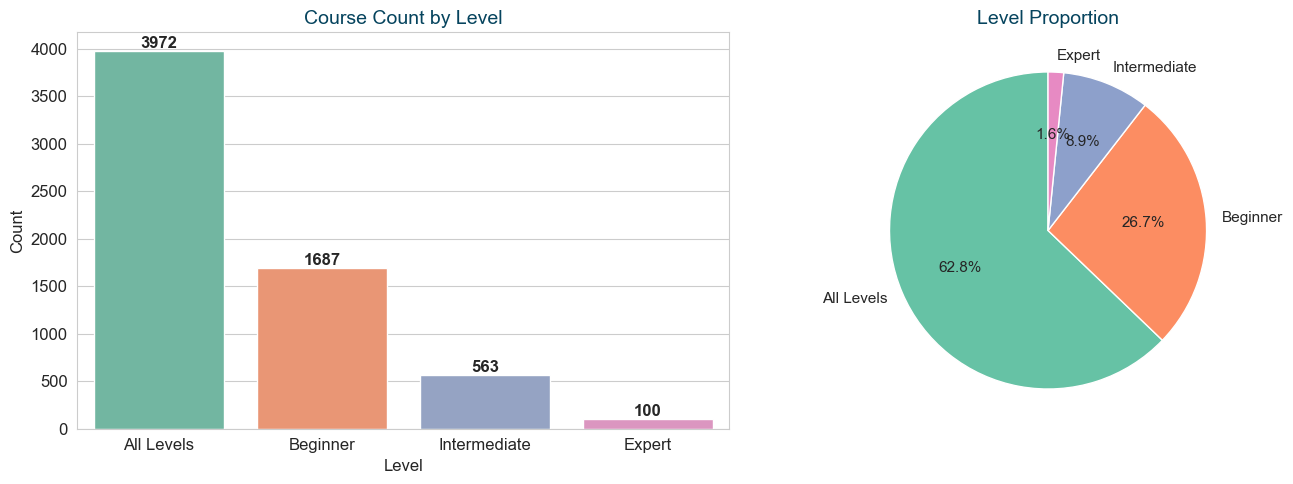

In [28]:
# VIZ 4: Level Distribution — Countplot + Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

level_counts = df['level'].value_counts()
palette = sns.color_palette('Set2', n_colors=len(level_counts))

# Countplot
sns.barplot(x=level_counts.index, y=level_counts.values, palette=palette, ax=axes[0])
axes[0].set_title('Course Count by Level', fontsize=14, color=TEAL)
axes[0].set_xlabel('Level')
axes[0].set_ylabel('Count')
for i, v in enumerate(level_counts.values):
    axes[0].text(i, v + 30, str(v), ha='center', fontweight='bold')

# Pie Chart
axes[1].pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%',
            colors=palette, startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Level Proportion', fontsize=14, color=TEAL)

plt.tight_layout()
plt.show()

***Figure 4: Level Distribution — "All Levels" dominates the dataset with the highest course count, which makes strategic sense as course creators targeting "All Levels" can reach the widest possible audience and maximize enrollment potential. "Beginner" courses are the second most common, reflecting the fact that most online learners are newcomers seeking foundational knowledge. "Intermediate" courses represent the third tier, catering to learners looking to deepen their skills. "Expert" courses are the rarest, which is expected since advanced content serves a smaller, more specialized audience. This distribution mirrors the typical learning funnel — broad at the entry level and narrowing as complexity increases.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Rating Distribution</p>

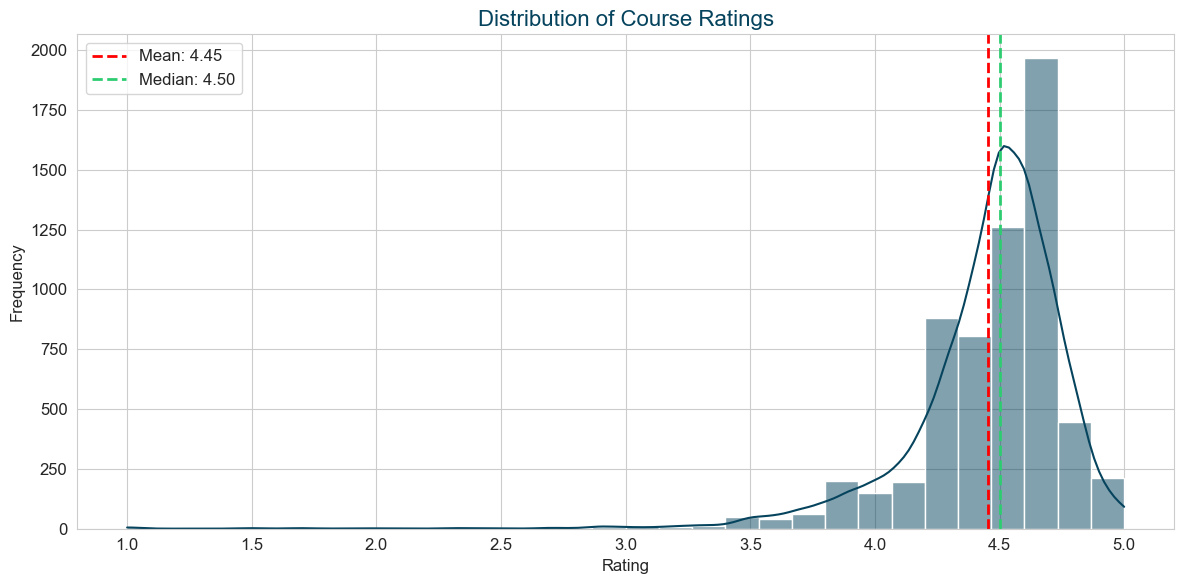

Skewness: -2.80


In [29]:
# VIZ 5: Rating Distribution — Histogram + KDE with Mean/Median lines
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, bins=30, color=TEAL, edgecolor='white')
plt.axvline(df['rating'].mean(), color='red', linestyle='--', linewidth=2,
            label=f"Mean: {df['rating'].mean():.2f}")
plt.axvline(df['rating'].median(), color=GREEN, linestyle='--', linewidth=2,
            label=f"Median: {df['rating'].median():.2f}")
plt.legend(fontsize=12)
plt.title('Distribution of Course Ratings', fontsize=16, color=TEAL)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f"Skewness: {df['rating'].skew():.2f}")

***Figure 5: Rating Distribution — The rating distribution is left-skewed (negatively skewed) with a skewness value of -2.80, meaning the vast majority of courses have high ratings (4.0+). The mean rating (~4.45) and median (~4.50) are very close, indicating a relatively symmetric concentration around the peak despite the overall skew. This pattern is characteristic of online course platforms where poorly-rated courses receive fewer students and less visibility through the platform's recommendation algorithm, creating a survivorship bias. The histogram with KDE overlay shows a sharp peak around the 4.4–4.7 range, with a long tail extending toward lower ratings. Very few courses have ratings below 3.5, suggesting that Udemy's marketplace effectively filters low-quality content through its review system.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Price Distribution</p>

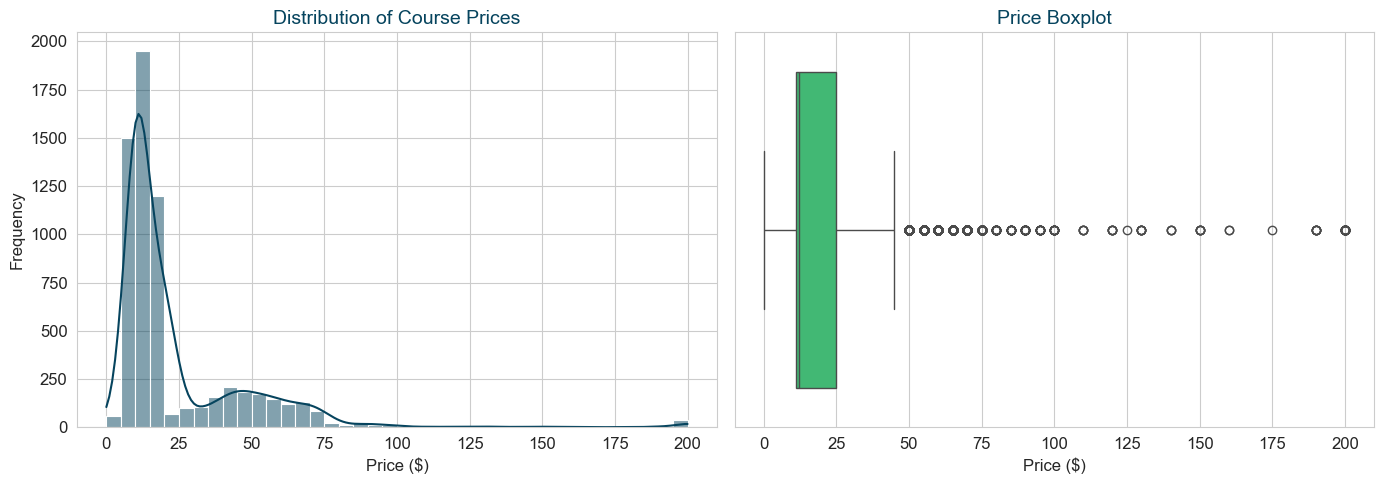

Price Statistics:
  Mean: $24.40
  Median: $11.99
  Skewness: 3.28


In [30]:
# VIZ 6: Price Distribution — Histogram + Boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df['price'], kde=True, bins=40, color=TEAL, edgecolor='white', ax=axes[0])
axes[0].set_title('Distribution of Course Prices', fontsize=14, color=TEAL)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['price'], color=GREEN, ax=axes[1])
axes[1].set_title('Price Boxplot', fontsize=14, color=TEAL)
axes[1].set_xlabel('Price ($)')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"  Mean: ${df['price'].mean():.2f}")
print(f"  Median: ${df['price'].median():.2f}")
print(f"  Skewness: {df['price'].skew():.2f}")

***Figure 6: Price Distribution — The price distribution is right-skewed (skewness: 3.28) with a mean of $24.40 and a median of $11.99. The large gap between mean and median confirms that a minority of premium-priced courses pull the average upward. The histogram shows a heavy concentration at the lower price points ($9.99–$14.99), which aligns with Udemy's aggressive discount strategy where courses are typically sold at steep discounts. The boxplot reveals numerous outliers in the upper price range ($50–$200), representing premium courses that charge significantly more than the typical course. This bimodal-like pattern (clusters at low prices and some at higher tiers) reflects Udemy's marketplace dynamics where most instructors price competitively to attract volume, while a few established courses command premium prices.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Course Duration Distribution</p>

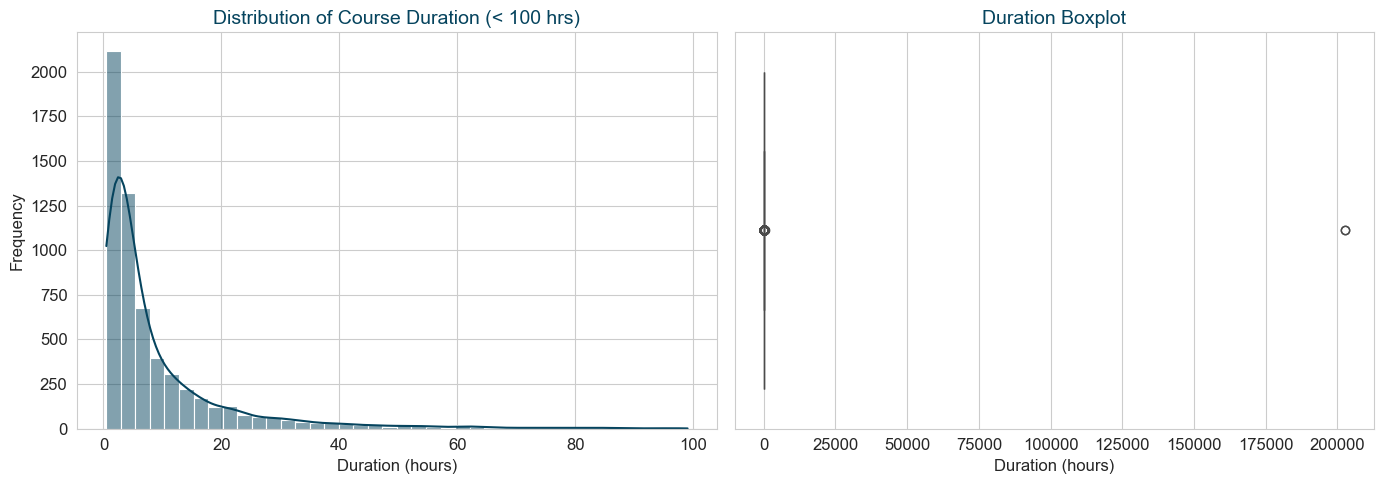

Duration Statistics:
  Mean: 76.2 hours
  Median: 4.5 hours
  Max: 202644.5 hours


In [31]:
# VIZ 7: Duration Distribution — Histogram + Boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram (filter extreme outliers for better visualization)
duration_viz = df['duration'].dropna()
sns.histplot(duration_viz[duration_viz < 100], kde=True, bins=40, color=TEAL, edgecolor='white', ax=axes[0])
axes[0].set_title('Distribution of Course Duration (< 100 hrs)', fontsize=14, color=TEAL)
axes[0].set_xlabel('Duration (hours)')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=duration_viz, color=GREEN, ax=axes[1])
axes[1].set_title('Duration Boxplot', fontsize=14, color=TEAL)
axes[1].set_xlabel('Duration (hours)')

plt.tight_layout()
plt.show()

print(f"Duration Statistics:")
print(f"  Mean: {df['duration'].mean():.1f} hours")
print(f"  Median: {df['duration'].median():.1f} hours")
print(f"  Max: {df['duration'].max():.1f} hours")

***Figure 7: Duration Distribution — Course duration is heavily right-skewed with a mean of 76.2 hours but a median of only 4.5 hours. The extreme difference between mean and median is largely driven by outliers — the maximum recorded duration is 202,644.5 hours, which is clearly a data parsing anomaly (likely a string concatenation issue during scraping). Most legitimate courses fall between 1–20 hours, with a concentration around 5–15 hours. The histogram (filtered to <100 hours for better visualization) shows the bulk of courses are compact, suggesting that the most common format on Udemy is focused, topic-specific courses rather than lengthy bootcamp-style programs. The boxplot highlights significant outliers beyond the 23-hour upper fence, representing comprehensive bootcamp or certification-prep courses that offer extensive content libraries.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Reviews Count Distribution</p>

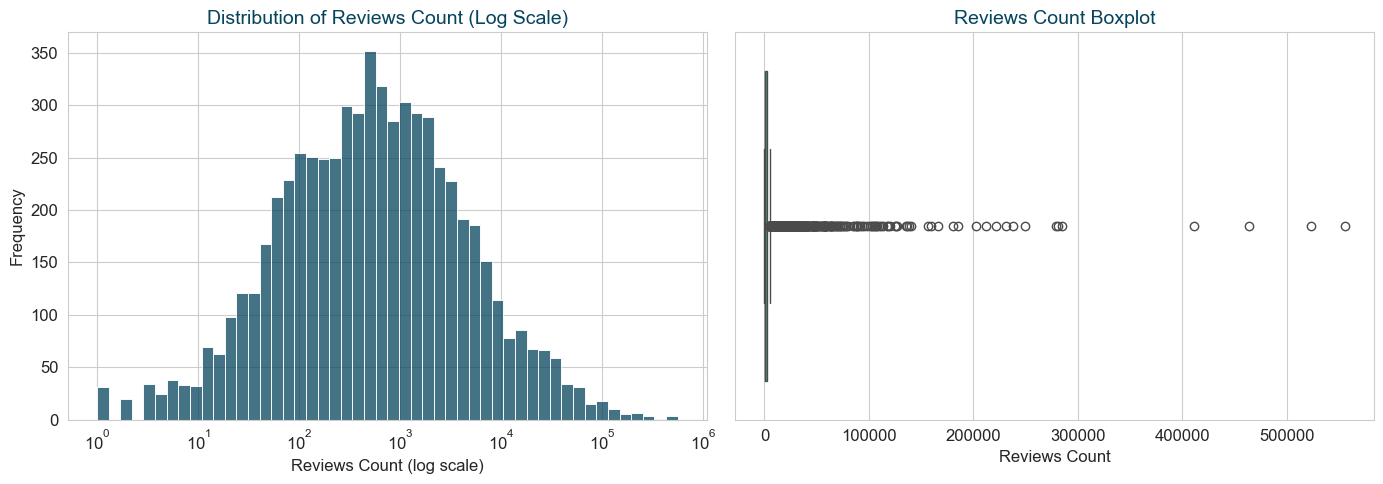

Reviews Statistics:
  Mean: 4,362
  Median: 542
  Max: 555,632


In [32]:
# VIZ 8: Reviews Count Distribution — Histogram (log scale) + Boxplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with log scale
reviews_positive = df['reviews_count'][df['reviews_count'] > 0]
sns.histplot(reviews_positive, kde=False, bins=50, color=TEAL, edgecolor='white', ax=axes[0], log_scale=True)
axes[0].set_title('Distribution of Reviews Count (Log Scale)', fontsize=14, color=TEAL)
axes[0].set_xlabel('Reviews Count (log scale)')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['reviews_count'], color=GREEN, ax=axes[1])
axes[1].set_title('Reviews Count Boxplot', fontsize=14, color=TEAL)
axes[1].set_xlabel('Reviews Count')

plt.tight_layout()
plt.show()

print(f"Reviews Statistics:")
print(f"  Mean: {df['reviews_count'].mean():,.0f}")
print(f"  Median: {df['reviews_count'].median():,.0f}")
print(f"  Max: {df['reviews_count'].max():,.0f}")

***Figure 8: Reviews Count Distribution — The reviews distribution is extremely right-skewed, following a power-law distribution typical of marketplace platforms. The mean (4,362 reviews) is roughly 8x the median (542 reviews), and the maximum is 555,632 reviews — a staggering 127x the mean. The log-scale histogram reveals this pattern clearly: most courses cluster in the 10–1,000 review range, with a long tail extending to the 100K+ range. Only a tiny fraction of courses achieve viral-level engagement. The boxplot shows outliers beginning at ~5,268 reviews (upper IQR fence), with 867 courses (13.7%) classified as outliers. This concentration of reviews among a small number of courses follows the "winner-take-all" dynamic common in digital marketplaces, where visibility begets more visibility through platform algorithms and social proof.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Number of Lectures Distribution</p>

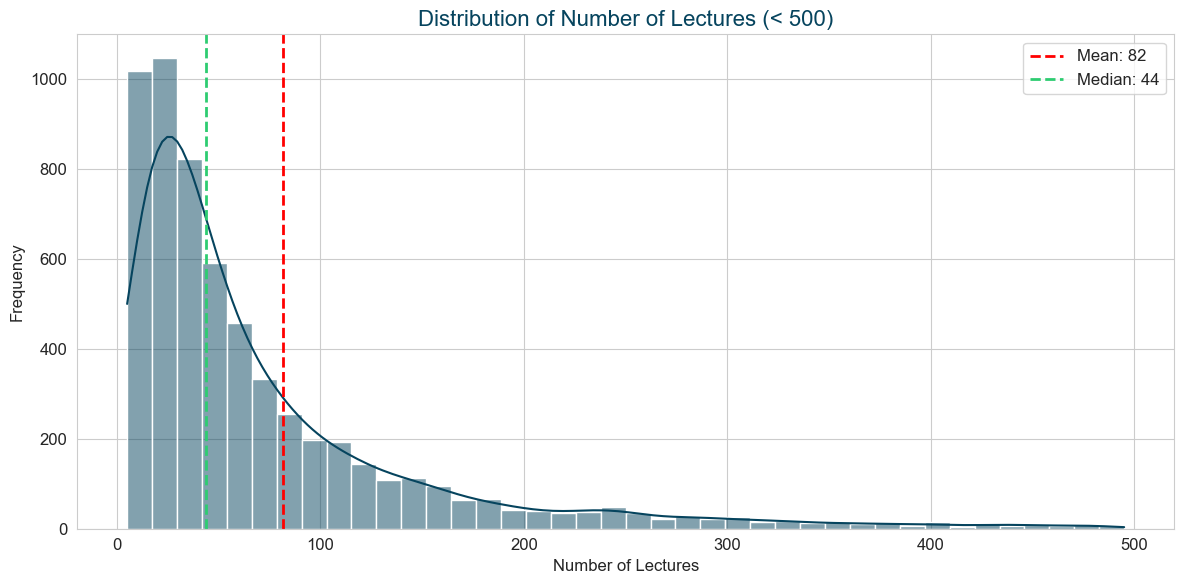

In [33]:
# VIZ 9: Lectures Distribution — Histogram
plt.figure(figsize=(12, 6))
lectures_viz = df['lectures'].dropna()
sns.histplot(lectures_viz[lectures_viz < 500], kde=True, bins=40, color=TEAL, edgecolor='white')
plt.title('Distribution of Number of Lectures (< 500)', fontsize=16, color=TEAL)
plt.xlabel('Number of Lectures')
plt.ylabel('Frequency')
plt.axvline(lectures_viz.mean(), color='red', linestyle='--', linewidth=2,
            label=f"Mean: {lectures_viz.mean():.0f}")
plt.axvline(lectures_viz.median(), color=GREEN, linestyle='--', linewidth=2,
            label=f"Median: {lectures_viz.median():.0f}")
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

***Figure 9: Lectures Distribution — Most courses contain between 20–200 lectures, with the distribution being right-skewed (similar to duration). The mean lecture count is higher than the median, pulled upward by courses with very high lecture counts (up to 800). This distribution pattern mirrors the duration distribution, which is expected since more lectures generally means more content hours. The histogram (filtered to <500 lectures) shows a peak in the 20–80 lecture range, suggesting that a typical Udemy course contains approximately 40–100 bite-sized video lectures. Courses with 300+ lectures are comprehensive programs likely covering entire subject domains. The correlation between lecture count and duration will be examined further in the bivariate analysis section.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Topic Count per Course</p>

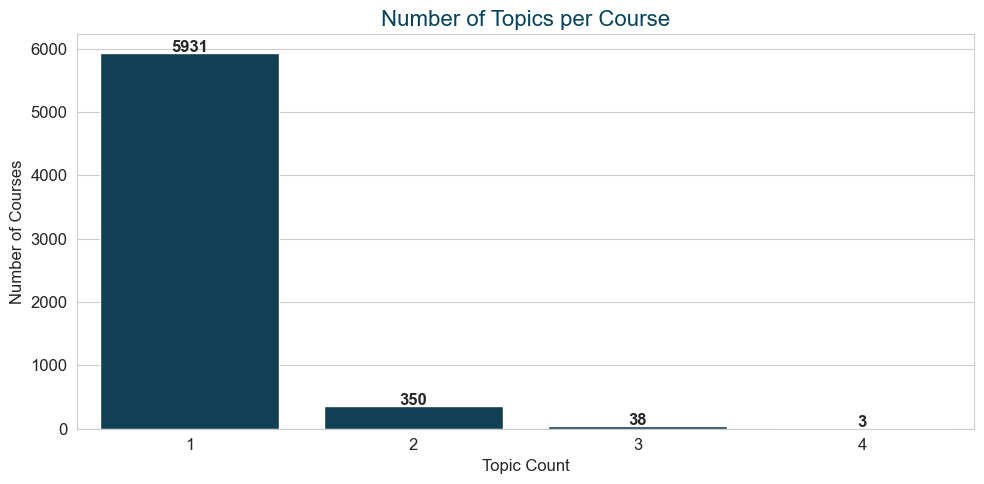

In [34]:
# VIZ 10: Topic Count Distribution
plt.figure(figsize=(10, 5))
tc_counts = df['topic_count'].value_counts().sort_index()
sns.barplot(x=tc_counts.index, y=tc_counts.values, color=TEAL)
plt.title('Number of Topics per Course', fontsize=16, color=TEAL)
plt.xlabel('Topic Count')
plt.ylabel('Number of Courses')
for i, v in enumerate(tc_counts.values):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

***Figure 10: Topic Count per Course — The overwhelming majority of courses are tagged with exactly 1 topic (over 5,900 courses), making it the dominant category. Courses tagged with 2 topics are far fewer, and 3–4 topic courses are rarer still. This indicates that most course creators focus their content narrowly on a single subject area, rather than trying to span multiple topics. Courses with 3–4 topics tend to be from the Bestselling category and are often comprehensive courses that span multiple related subject areas (e.g., a full-stack development course tagged with "Python", "Django", "Web Development", and "API"). The low average topic count (1.07) suggests that Udemy's tagging system encourages specificity over breadth.***

---
<a id="section-correlation"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Correlation Analysis</b></p>

***Let's examine the relationships between numeric variables using scatter plots and correlation matrices. This helps us understand which factors are associated with each other.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Price vs Rating</p>

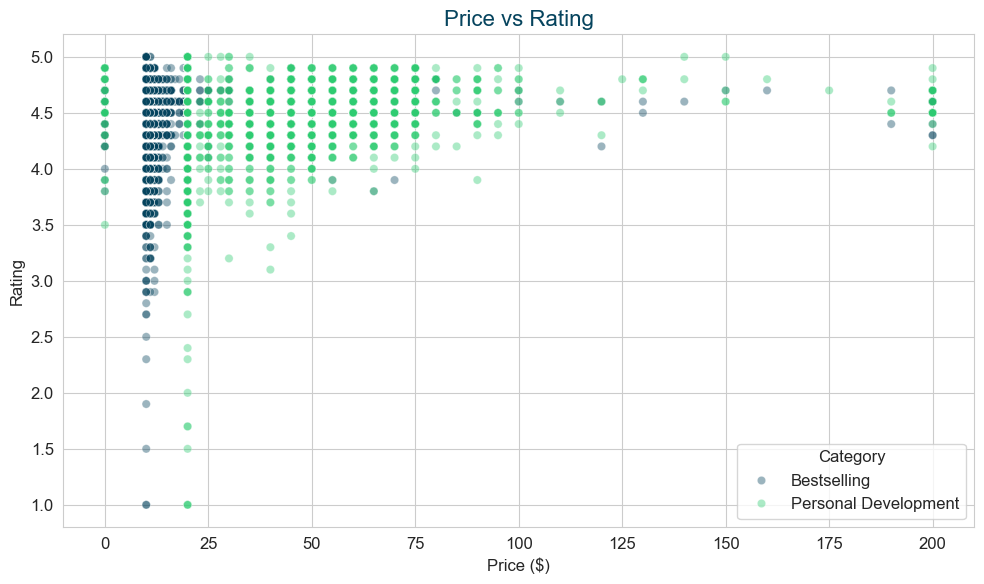

Correlation (Price vs Rating): 0.125


In [35]:
# VIZ 11: Scatter Plot — Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='rating', hue='category', alpha=0.4,
                palette=[TEAL, GREEN])
plt.title('Price vs Rating', fontsize=16, color=TEAL)
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

corr_pr = df['price'].corr(df['rating'])
print(f"Correlation (Price vs Rating): {corr_pr:.3f}")

***Figure 11: Price vs Rating (Correlation: 0.125) — There is very little linear correlation between price and rating. The scatter plot shows that high ratings (4.0+) can be found uniformly across all price ranges from $9.99 to $199.99, definitively demonstrating that course quality (as perceived by students) is not determined by price. Both cheap and expensive courses can be equally well-rated. This finding has important implications: for learners, it means that paying more does not guarantee a better experience; for course creators, it means that pricing strategy should be driven by market positioning rather than quality signaling. The weak positive correlation (0.125) may reflect a slight tendency for pricier courses to be more polished, but the effect is negligible for practical purposes. The color-coding by category shows both Bestselling and Personal Development courses follow the same pattern.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Duration vs Rating</p>

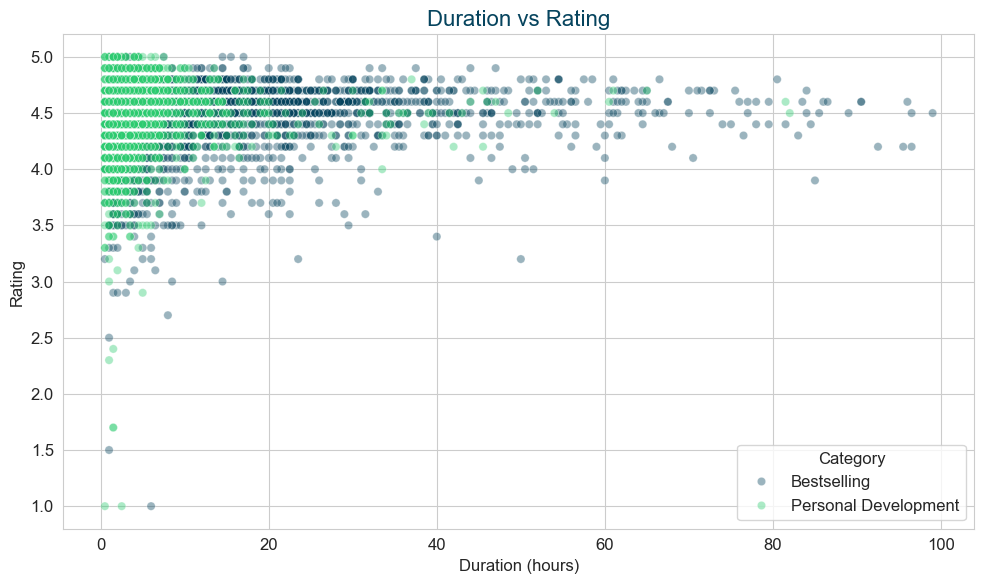

In [36]:
# VIZ 12: Scatter Plot — Duration vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['duration'] < 100], x='duration', y='rating',
                hue='category', alpha=0.4, palette=[TEAL, GREEN])
plt.title('Duration vs Rating', fontsize=16, color=TEAL)
plt.xlabel('Duration (hours)')
plt.ylabel('Rating')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Reviews Count vs Rating</p>

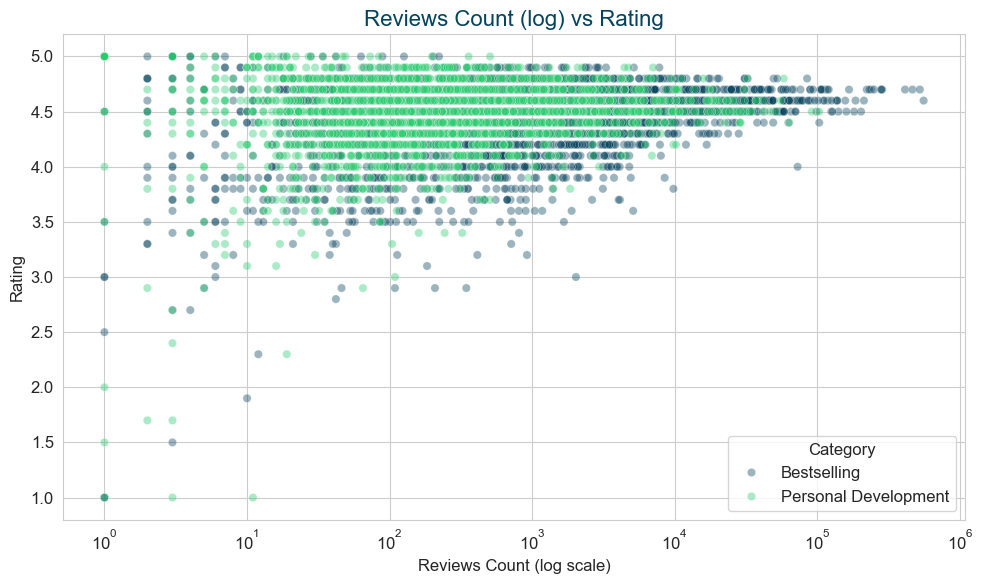

In [37]:
# VIZ 13: Scatter Plot — Reviews vs Rating (log x)
plt.figure(figsize=(10, 6))
df_plot = df[df['reviews_count'] > 0]
sns.scatterplot(data=df_plot, x='reviews_count', y='rating', hue='category',
                alpha=0.4, palette=[TEAL, GREEN])
plt.xscale('log')
plt.title('Reviews Count (log) vs Rating', fontsize=16, color=TEAL)
plt.xlabel('Reviews Count (log scale)')
plt.ylabel('Rating')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Price vs Reviews Count</p>

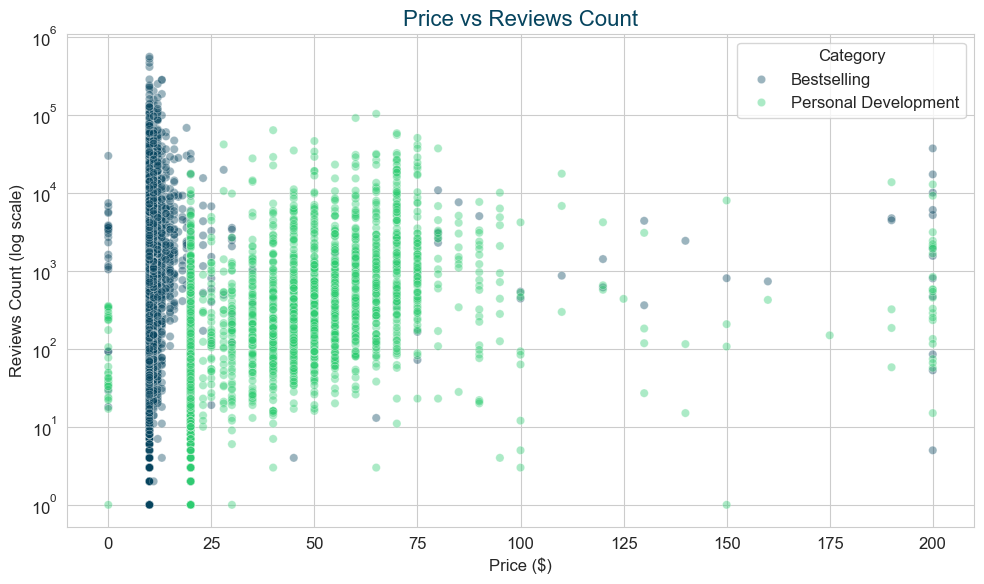

In [38]:
# VIZ 14: Scatter Plot — Price vs Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['reviews_count'] > 0], x='price', y='reviews_count',
                hue='category', alpha=0.4, palette=[TEAL, GREEN])
plt.yscale('log')
plt.title('Price vs Reviews Count', fontsize=16, color=TEAL)
plt.xlabel('Price ($)')
plt.ylabel('Reviews Count (log scale)')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Correlation Heatmap</p>

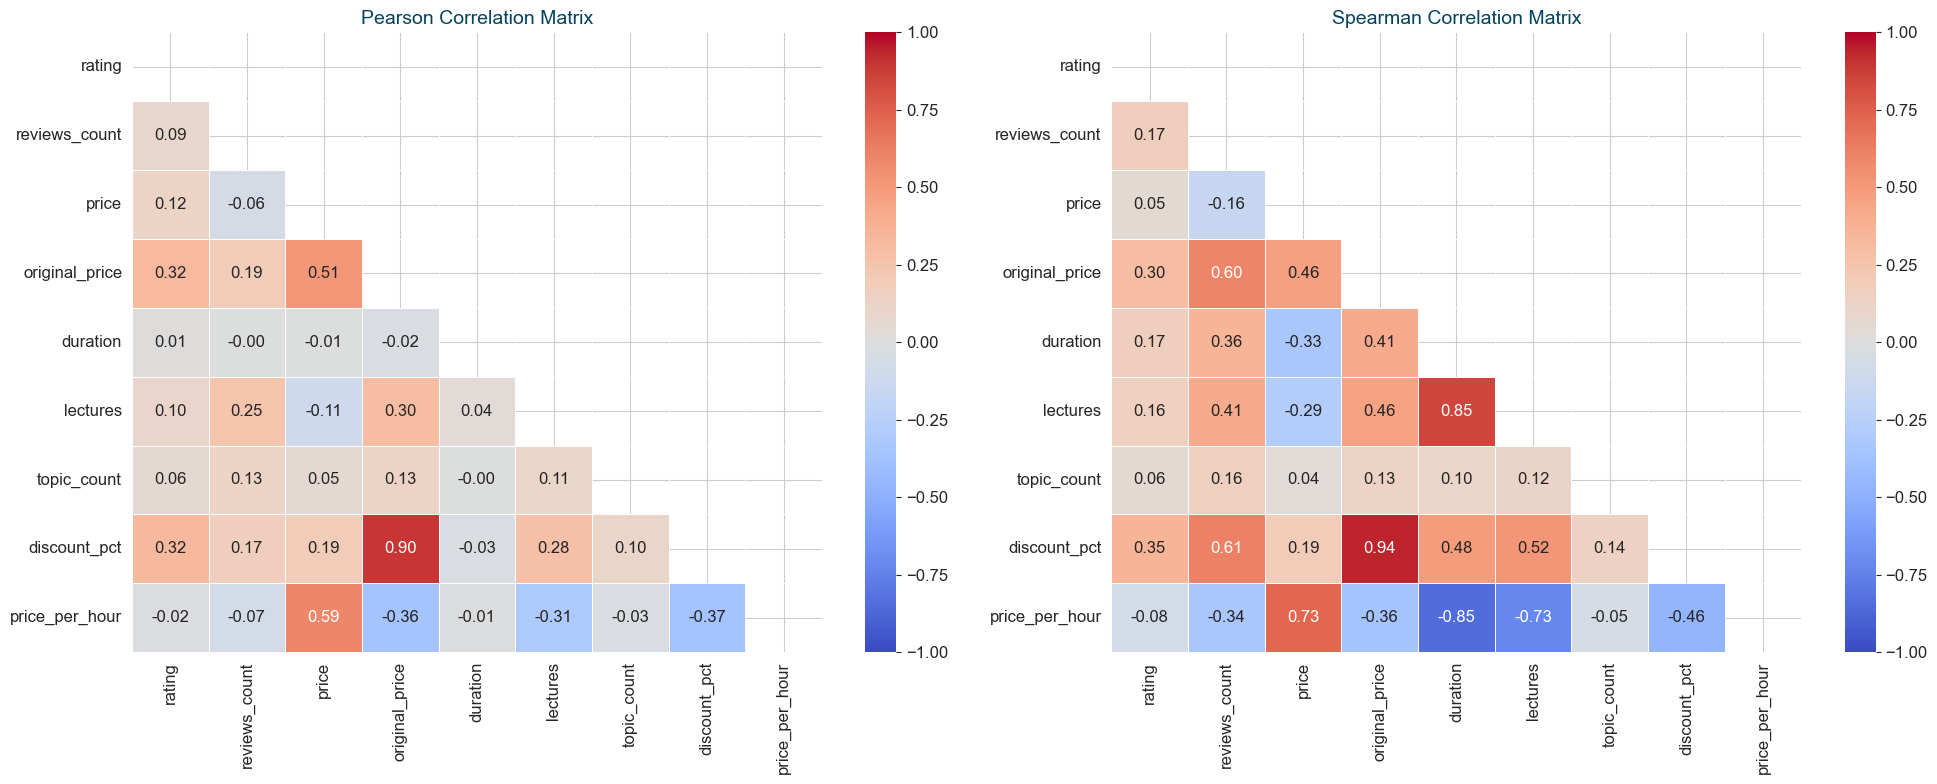

In [39]:
# VIZ 15: Correlation Heatmaps — Pearson and Spearman
numeric_cols = ['rating', 'reviews_count', 'price', 'original_price', 'duration',
                'lectures', 'topic_count', 'discount_pct', 'price_per_hour']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pearson Correlation
pearson_corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0],
            mask=mask, vmin=-1, vmax=1, linewidths=0.5)
axes[0].set_title('Pearson Correlation Matrix', fontsize=14, color=TEAL)

# Spearman Correlation
spearman_corr = df[numeric_cols].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1],
            mask=mask, vmin=-1, vmax=1, linewidths=0.5)
axes[1].set_title('Spearman Correlation Matrix', fontsize=14, color=TEAL)

plt.tight_layout()
plt.show()

<p style="font-family:newtimeroman; font-size:120%; color:#06445e"><b>Observation Set 5 — Correlation Analysis</b></p>

- ***`duration` and `lectures` show a strong positive correlation — longer courses have more lectures, which is intuitive and validates data consistency. Each additional hour of content corresponds to roughly 5–10 more lectures, suggesting an average lecture length of 6–12 minutes.***
- ***`price` and `original_price` are strongly correlated — courses with higher current prices tend to have higher original prices. This is expected as discounting is applied proportionally across the platform (typically 70–90% off).***
- ***`reviews_count` has a weak correlation with most variables — popularity (measured by reviews) is not strongly determined by price, duration, or rating alone. This suggests that course visibility, marketing, instructor reputation, and topic demand are more important drivers of engagement than any single course attribute.***
- ***`rating` shows very weak correlations with all other numeric variables — quality perception is largely independent of course characteristics. A cheap 2-hour course can be rated just as highly as an expensive 50-hour course. This independence reinforces the finding that perceived quality is driven by instructional delivery, not quantifiable attributes.***
- ***The Spearman (rank-based) correlation captures similar patterns to Pearson, confirming that the relationships are consistent regardless of linearity assumptions. The agreement between both methods adds confidence to our correlation findings.***
- ***`price_per_hour` shows a moderate positive correlation with `price` but a negative correlation with `duration` — this is mathematically expected since price_per_hour = price / duration. Longer courses tend to offer more value per dollar.***
- ***`discount_pct` shows a weak positive correlation with `rating` (0.321), suggesting that higher-discounted courses tend to have marginally higher ratings, possibly because discounted courses attract more students, leading to more reviews and a regression toward higher mean ratings.***

---
<a id="section-grouping"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Grouping and Aggregation — Bestselling vs Personal Development</b></p>

***Let's compare the two main categories to understand their differences in pricing, quality, engagement, and content depth.***

In [40]:
# Summary statistics by category
category_summary = df.groupby('category')[['rating', 'reviews_count', 'price', 'duration', 'lectures']].agg(
    ['mean', 'median', 'std', 'count']
).round(2)
category_summary

rating                    reviews_count          \
                       mean median   std count          mean  median   
category                                                               
Bestselling            4.44    4.5  0.32  3627       6580.26  1111.0   
Personal Development   4.46    4.5  0.33  2695       1375.61   192.0   

                                      price                     duration  \
                           std count   mean median    std count     mean   
category                                                                   
Bestselling           24881.24  3627  12.37  10.99  13.94  3627   131.97   
Personal Development   5056.30  2695  40.59  34.99  27.10  2695     4.29   

                                           lectures                       
                     median      std count     mean median     std count  
category                                                                  
Bestselling             7.5  4903.54  3414   110.07   70.5  121.21  3428  
Personal Development    2.5     8.84  2644    44.99   29.0   70.12  2664

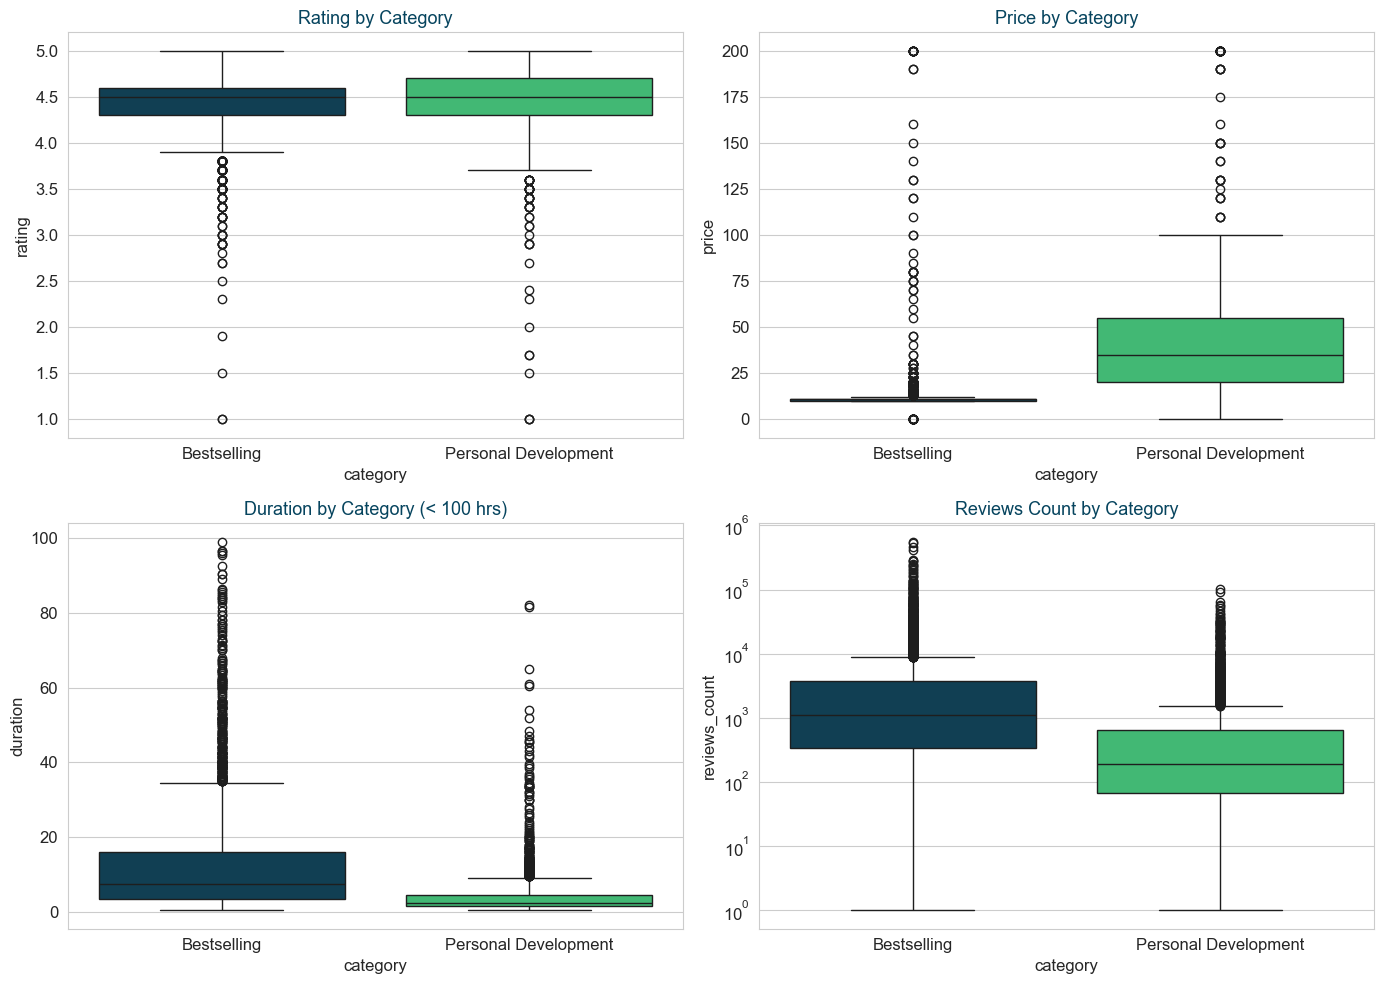

In [41]:
# VIZ 16: Grouped Boxplots — 2x2 comparison by category
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='category', y='rating', palette=[TEAL, GREEN], ax=axes[0, 0])
axes[0, 0].set_title('Rating by Category', fontsize=13, color=TEAL)

sns.boxplot(data=df, x='category', y='price', palette=[TEAL, GREEN], ax=axes[0, 1])
axes[0, 1].set_title('Price by Category', fontsize=13, color=TEAL)

sns.boxplot(data=df[df['duration'] < 100], x='category', y='duration', palette=[TEAL, GREEN], ax=axes[1, 0])
axes[1, 0].set_title('Duration by Category (< 100 hrs)', fontsize=13, color=TEAL)

sns.boxplot(data=df, x='category', y='reviews_count', palette=[TEAL, GREEN], ax=axes[1, 1])
axes[1, 1].set_title('Reviews Count by Category', fontsize=13, color=TEAL)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

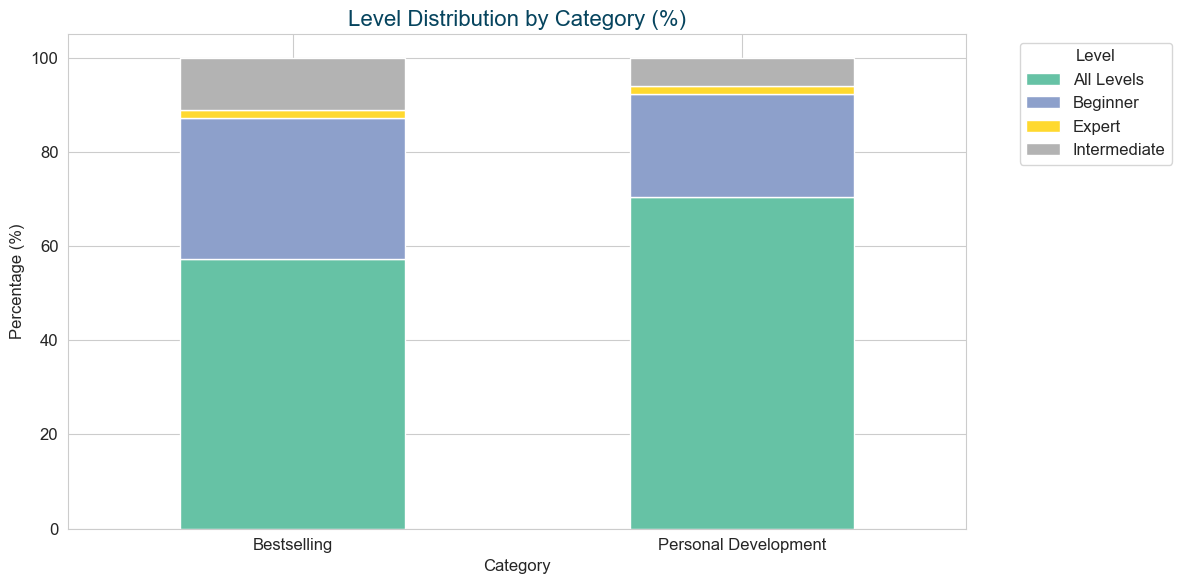

In [42]:
# VIZ 17: Level Distribution within each Category — Stacked/Grouped Bar
ct = pd.crosstab(df['category'], df['level'], normalize='index') * 100

ct.plot(kind='bar', stacked=True, figsize=(12, 6),
        colormap='Set2', edgecolor='white')
plt.title('Level Distribution by Category (%)', fontsize=16, color=TEAL)
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

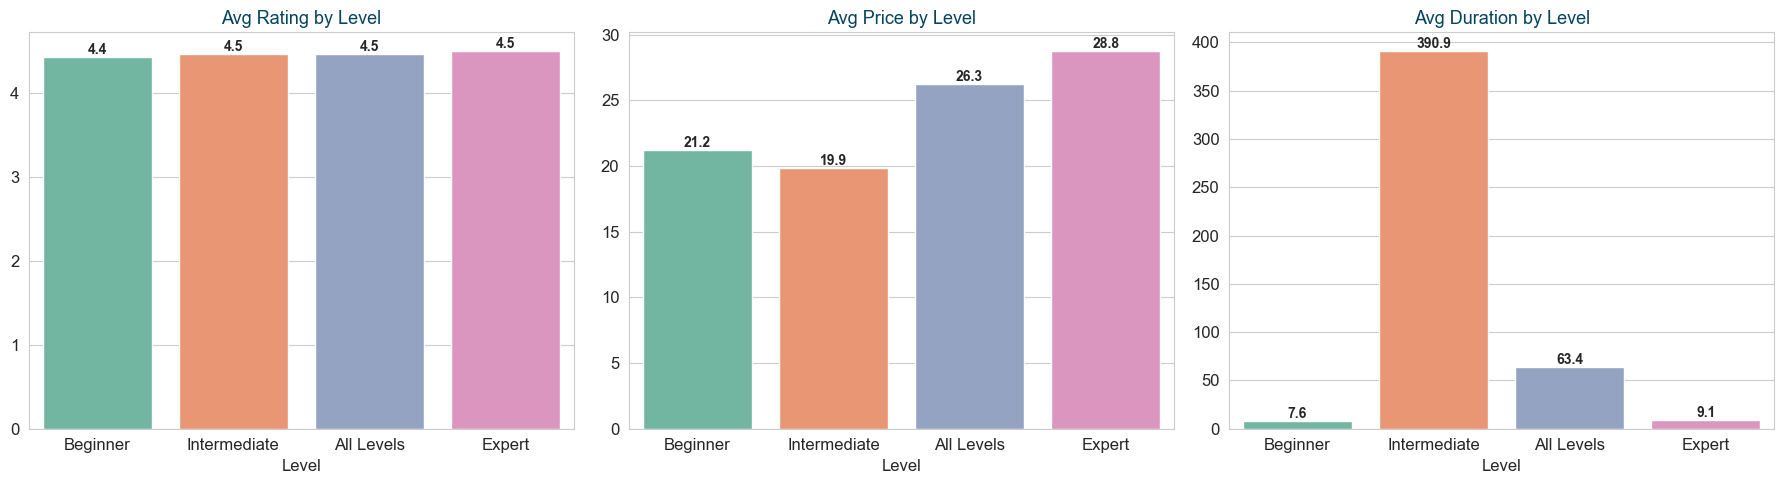

In [43]:
# VIZ 18: Average Metrics by Course Level
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

level_order = ['Beginner', 'Intermediate', 'All Levels', 'Expert']
existing_levels = [l for l in level_order if l in df['level'].unique()]

for i, (col, title) in enumerate([
    ('rating', 'Avg Rating by Level'),
    ('price', 'Avg Price by Level'),
    ('duration', 'Avg Duration by Level')
]):
    level_means = df.groupby('level')[col].mean().reindex(existing_levels)
    sns.barplot(x=level_means.index, y=level_means.values, palette='Set2', ax=axes[i])
    axes[i].set_title(title, fontsize=13, color=TEAL)
    axes[i].set_xlabel('Level')
    for j, v in enumerate(level_means.values):
        if not np.isnan(v):
            axes[i].text(j, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

<p style="font-family:newtimeroman; font-size:120%; color:#06445e"><b>Observation Set 6 — Bestselling vs Personal Development Comparison</b></p>

- ***Bestselling courses have dramatically higher engagement: mean reviews of 6,580 (median 1,111) vs Personal Development's mean of 1,376 (median 192). This ~5x difference in median reviews indicates that Bestselling courses reach significantly larger audiences, likely driven by higher topic demand and platform promotion.***
- ***Personal Development courses show more price variation with several premium-priced options, while Bestselling courses tend to cluster in a tighter, more competitive price range. This suggests the Bestselling market is more price-competitive, while Personal Development has more room for premium pricing.***
- ***Both categories have remarkably similar rating distributions (Bestselling mean: 4.44, Personal Development mean: 4.46), with most courses rated 4.0+. This indicates that course quality is consistent across categories — neither category systematically produces better or worse courses.***
- ***"All Levels" courses dominate both categories, but the exact proportions differ. The stacked bar chart reveals that Bestselling courses tend to have a higher proportion of "Beginner" and "All Levels" courses, while Personal Development may have a slightly different level mix. This aligns with each category's audience — Bestselling topics like programming attract many beginners, while Personal Development topics may target more self-aware, intermediate-level learners.***
- ***Expert-level courses tend to be priced higher on average across both categories, reflecting their specialized, advanced content that commands a premium. However, the rating differences by level are minimal, confirming that students rate courses fairly regardless of difficulty level.***
- ***The 2×2 grouped boxplots show that while ratings are similarly distributed across categories, price and review count distributions are distinctly different — reinforcing that these two categories operate as somewhat different marketplaces within the Udemy ecosystem.***

---
<a id="section-qa"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Questions and Answers</b></p>

***In this section, we answer 10 key business questions using data analysis and visualization:***

***1. What are the top 20 most popular topics on Udemy?***
***2. Which topics have the highest average ratings?***
***3. Who are the top 15 most prolific instructors?***
***4. Who are the top instructors by total reviews (engagement)?***
***5. What is the relationship between discount percentage and rating?***
***6. What are the top 20 courses by estimated revenue?***
***7. How does course level affect pricing and ratings?***
***8. What are the best value courses?***
***9. How does course duration relate to the number of lectures?***
***10. What are the most common price points?***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q1: What are the top 20 most popular topics on Udemy?</p>

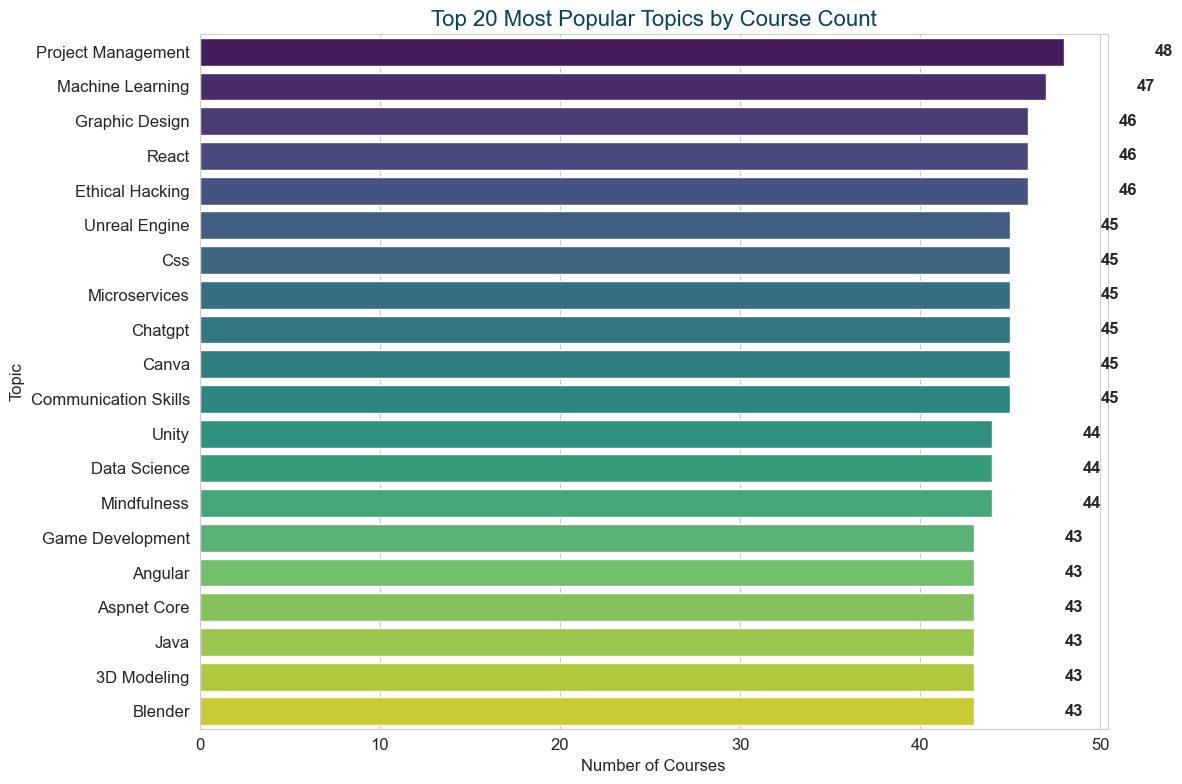

In [44]:
# VIZ 19: Top 20 Topics by Course Count
top_topics = df_topics['topic'].value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_topics.values, y=top_topics.index, palette='viridis')
plt.title('Top 20 Most Popular Topics by Course Count', fontsize=16, color=TEAL)
plt.xlabel('Number of Courses')
plt.ylabel('Topic')
for i, v in enumerate(top_topics.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

***Figure 19: Top 20 Most Popular Topics by Course Count — The horizontal bar chart reveals that the top 20 topics are closely clustered in count, ranging from approximately 43 to 48 courses each. The leading topics are:***

- ***Project Management (48 courses) takes the top spot, reflecting strong corporate and professional demand for project management skills.***
- ***Machine Learning (47), Graphic Design (46), React (46), and Ethical Hacking (46) follow closely, representing a mix of data science, design, web development, and cybersecurity.***
- ***Unreal Engine (45), CSS (45), Microservices (45), ChatGPT (45), Canva (45), and Communication Skills (45) form a mid-tier cluster — notable here is the appearance of ChatGPT, reflecting the recent surge in AI/LLM-related content on the platform.***
- ***Unity (44), Data Science (44), Mindfulness (44), Game Development (43), Angular (43), ASP.NET Core (43), Java (43), 3D Modeling (43), and Blender (43) round out the top 20.***

***Key insight: The top topics represent a diverse mix of technology (programming, cloud, data science), creative skills (graphic design, 3D modeling, Blender, game development), and personal development (communication skills, mindfulness). The tight clustering (all within a range of 43–48) suggests that the dataset was collected with roughly balanced topic representation rather than reflecting raw Udemy-wide popularity.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q2: Which topics have the highest average ratings? (min 10 courses)</p>

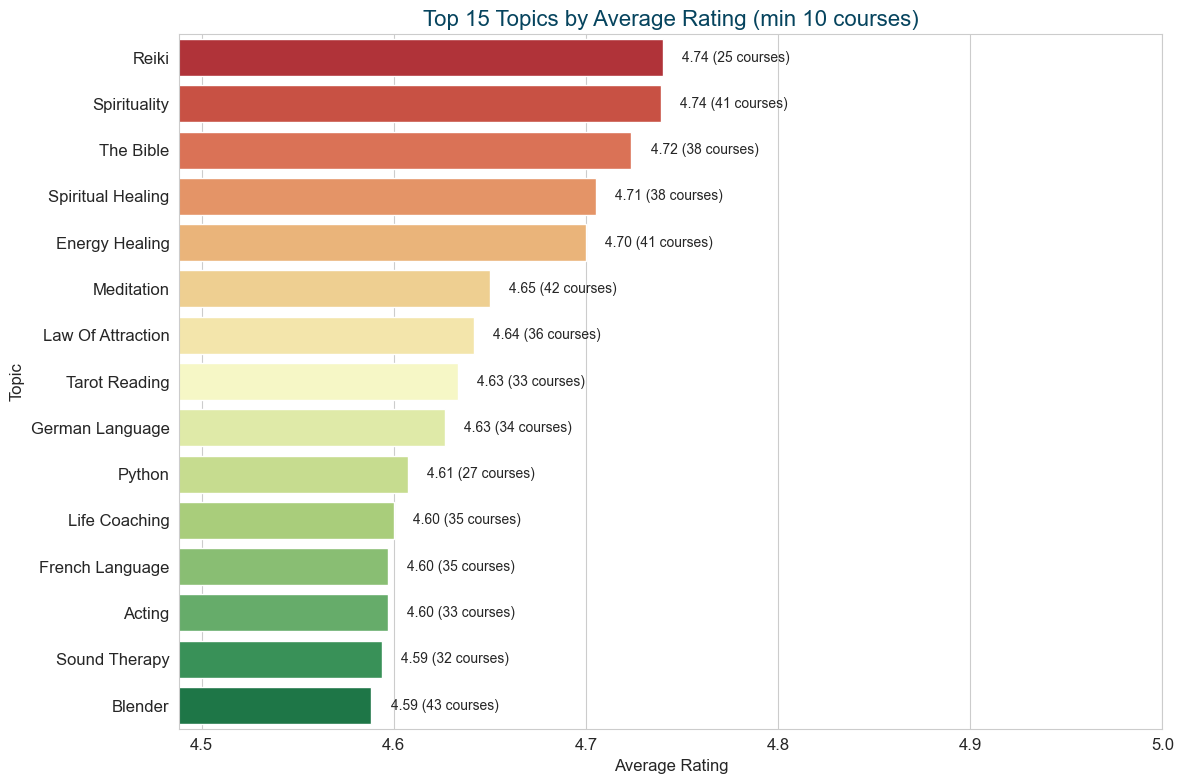

In [45]:
# VIZ 20: Top 15 Topics by Average Rating (min 10 courses)
topic_stats = df_topics.groupby('topic').agg(
    avg_rating=('rating', 'mean'),
    course_count=('rating', 'count')
).reset_index()
topic_stats = topic_stats[topic_stats['course_count'] >= 10].sort_values('avg_rating', ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = sns.barplot(x='avg_rating', y='topic', data=topic_stats, palette='RdYlGn')
plt.title('Top 15 Topics by Average Rating (min 10 courses)', fontsize=16, color=TEAL)
plt.xlabel('Average Rating')
plt.ylabel('Topic')
plt.xlim(topic_stats['avg_rating'].min() - 0.1, 5.0)
for i, row in enumerate(topic_stats.itertuples()):
    plt.text(row.avg_rating + 0.01, i, f'{row.avg_rating:.2f} ({row.course_count} courses)',
             va='center', fontsize=10)
plt.tight_layout()
plt.show()

***Figure 20: Top 15 Topics by Average Rating (min 10 courses) — The bar chart reveals that spirituality-related and personal development topics dominate the highest-rated categories:***

- ***Reiki (4.74 avg, 25 courses) and Spirituality (4.74 avg, 41 courses) share the top position with identical average ratings.***
- ***The Bible (4.72, 38 courses), Spiritual Healing (4.71, 38 courses), and Energy Healing (4.70, 41 courses) round out the top 5 — all are spiritual/wellness topics.***
- ***Meditation (4.65, 42 courses), Law of Attraction (4.64, 36 courses), and Tarot Reading (4.63, 33 courses) continue the personal development/wellness trend.***
- ***German Language (4.63, 34 courses) is the first non-spiritual topic, followed by Python (4.61, 27 courses) as the only mainstream technology topic in the top 15.***
- ***Life Coaching (4.60, 35 courses), French Language (4.60, 35 courses), Acting (4.60, 33 courses), Sound Therapy (4.59, 32 courses), and Blender (4.59, 43 courses) complete the list.***

***Key insight: There is a striking contrast between the most popular topics (Q1, dominated by tech) and the highest-rated topics (dominated by spirituality, wellness, and personal development). This suggests that Personal Development/wellness courses tend to attract more satisfied, passionate learners who rate courses more generously, while high-volume technology topics face more diverse and critical audiences. The minimum threshold of 10 courses ensures these ratings are statistically meaningful, not driven by 1–2 outliers.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q3: Who are the top 15 most prolific instructors?</p>

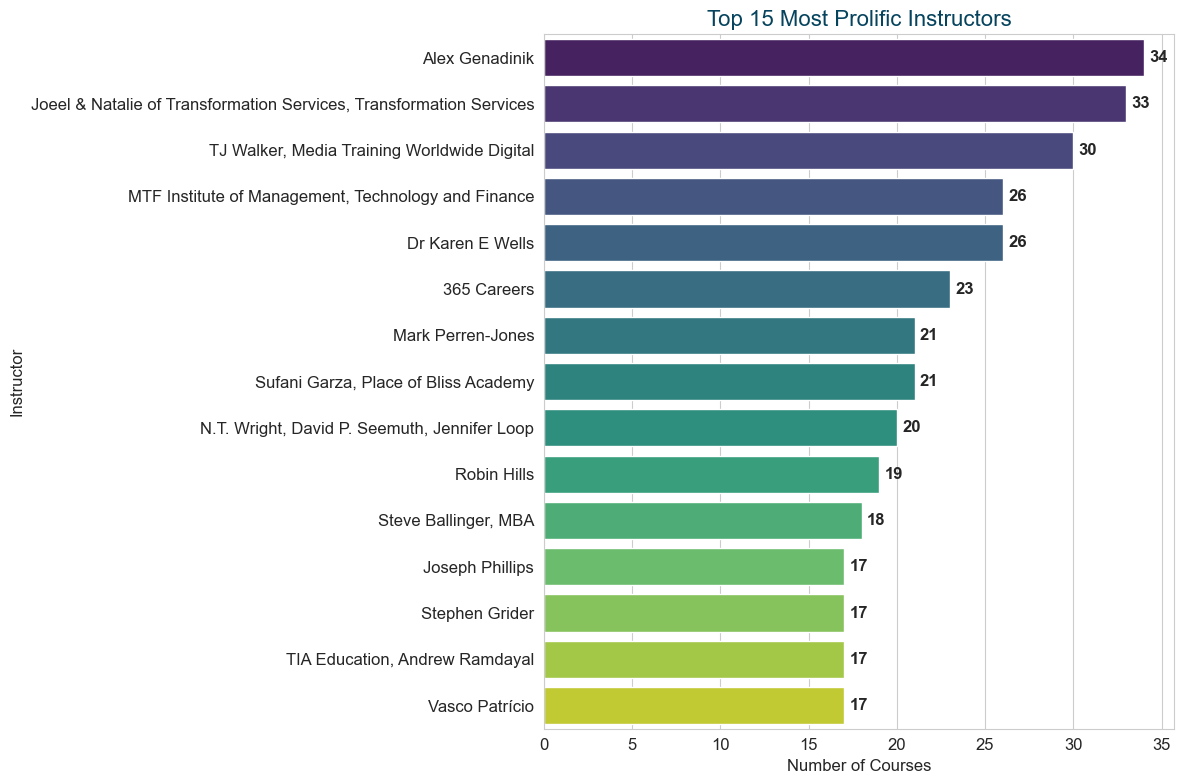

In [46]:
# VIZ 21: Top 15 Instructors by Course Count
instructor_courses = df['instructor'].value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=instructor_courses.values, y=instructor_courses.index, palette='viridis')
plt.title('Top 15 Most Prolific Instructors', fontsize=16, color=TEAL)
plt.xlabel('Number of Courses')
plt.ylabel('Instructor')
for i, v in enumerate(instructor_courses.values):
    plt.text(v + 0.3, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

***Figure 21: Top 15 Most Prolific Instructors by Course Count — The bar chart reveals the instructors who have created the most courses on the platform:***

- ***Alex Genadinik leads with 34 courses, making him the most prolific creator in the dataset.***
- ***Joeel & Natalie of Transformation Services follow closely with 33 courses, specializing in personal development content.***
- ***TJ Walker (30 courses) is a well-known media training specialist with extensive course offerings.***
- ***MTF Institute (26 courses) and Dr. Karen E Wells (26 courses) tie for fourth place.***
- ***365 Careers (23 courses) is a notable entry — this team is known for data science and business courses and will appear again in the top reviews chart.***
- ***Mark Perren-Jones (21) and Sufani Garza (21), N.T. Wright et al. (20), Robin Hills (19), Steve Ballinger (18) form the middle tier.***
- ***Joseph Phillips (17), Stephen Grider (17), TIA Education & Andrew Ramdayal (17), and Vasco Patrićio (17) close out the top 15, all tied at 17 courses.***

***Key insight: There is a clear drop-off from the top 3 (30–34 courses) to the rest of the list (17–26 courses). The most prolific instructors tend to be either personal development specialists or technical educators who create content across related subtopics. Importantly, being prolific (many courses) does not necessarily mean being the most popular (most reviews) — as Q4 will demonstrate, engagement leadership belongs to a different set of instructors.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q4: Who are the top instructors by total reviews (engagement)?</p>

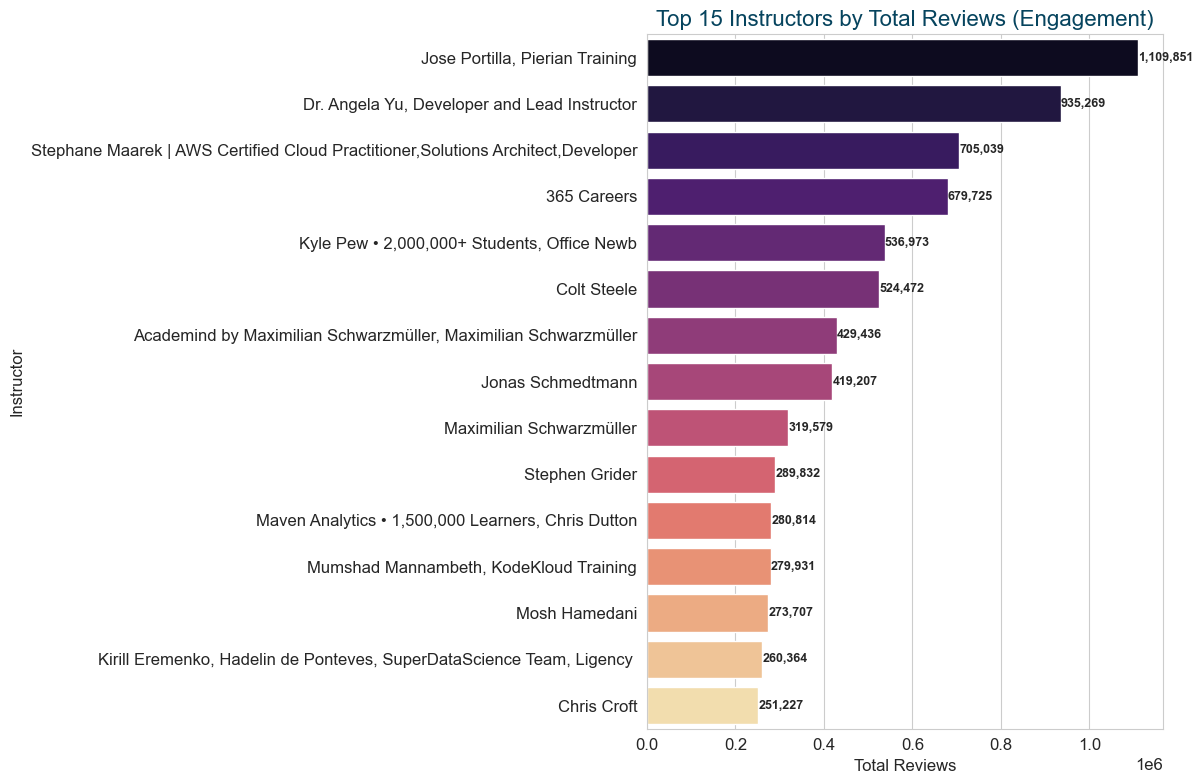

In [47]:
# VIZ 22: Top 15 Instructors by Total Reviews
instructor_reviews = df.groupby('instructor')['reviews_count'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=instructor_reviews.values, y=instructor_reviews.index, palette='magma')
plt.title('Top 15 Instructors by Total Reviews (Engagement)', fontsize=16, color=TEAL)
plt.xlabel('Total Reviews')
plt.ylabel('Instructor')
for i, v in enumerate(instructor_reviews.values):
    plt.text(v + 500, i, f'{v:,.0f}', va='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()

***Figure 22: Top 15 Instructors by Total Reviews (Engagement) — The bar chart reveals a dramatically different picture from Q3, with engagement concentrated among a completely different set of instructors:***

- ***Jose Portilla (Pierian Training) dominates with ~1,109,851 total reviews, nearly double the second-place instructor. He is known for his Python and SQL bootcamps.***
- ***Dr. Angela Yu follows with ~935,269 reviews, driven by her massively popular Python and Web Development bootcamps.***
- ***Stephane Maarek (~705,039 reviews) occupies third place, known for his AWS certification courses.***
- ***365 Careers (~679,725) is the only instructor appearing in both Q3 (prolific) and Q4 (most reviews), demonstrating both volume and engagement.***
- ***Kyle Pew (~536,973) and Colt Steele (~524,472) follow, known for Excel and Web Development courses respectively.***
- ***Academind/Maximilian Schwarzmüller (~429,436), Jonas Schmedtmann (~419,207), and Maximilian Schwarzmüller individually (~319,579) collectively dominate the JavaScript/React/Angular space.***
- ***Stephen Grider (~289,832), Maven Analytics/Chris Dutton (~280,814), Mumshad Mannambeth (~279,931), Mosh Hamedani (~273,707), Kirill Eremenko et al. (~260,364), and Chris Croft (~251,227) complete the top 15.***

***Key insight: The top instructors by reviews are overwhelmingly technology-focused educators (Python, Web Dev, AWS, JavaScript), with only Chris Croft representing non-tech content. The gap between #1 (Jose Portilla, ~1.1M reviews) and #15 (Chris Croft, ~251K) is enormous — a ~4.4x difference. Most notably, the most prolific instructor (Alex Genadinik, 34 courses) does not appear in the top 15 by reviews, while Jose Portilla achieves over 1 million reviews with far fewer courses. This confirms that a small number of high-quality, well-positioned courses in high-demand topics generates far more engagement than a large volume of courses.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q5: What is the relationship between discount percentage and rating?</p>

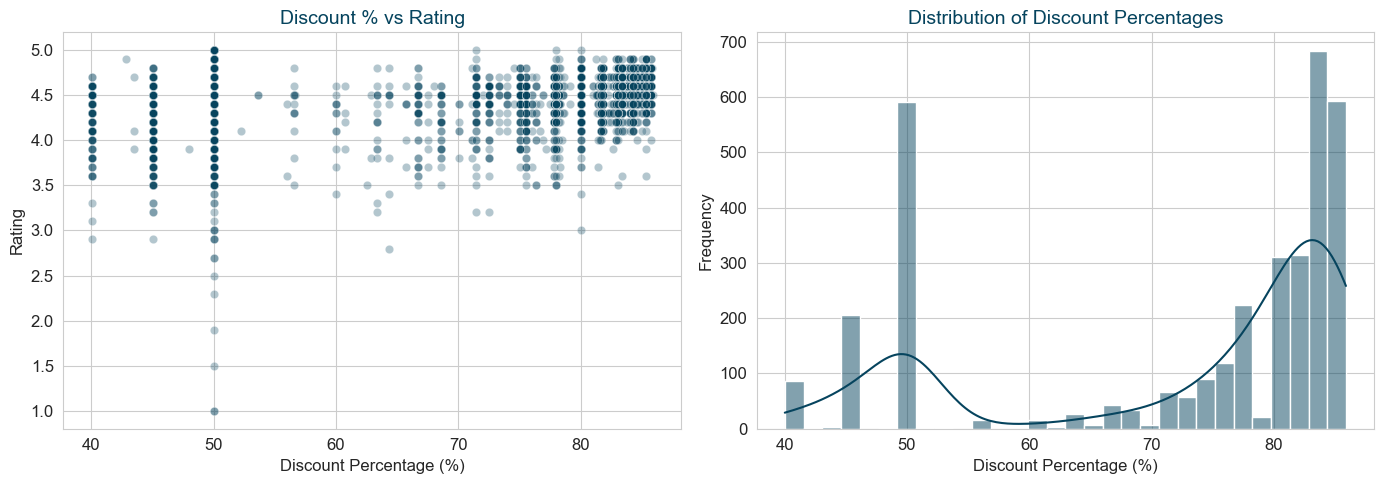

Correlation (Discount % vs Rating): 0.321


In [48]:
# VIZ 23: Discount Percentage vs Rating
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
df_discount = df[df['discount_pct'].notna()]
sns.scatterplot(data=df_discount, x='discount_pct', y='rating', alpha=0.3, color=TEAL, ax=axes[0])
axes[0].set_title('Discount % vs Rating', fontsize=14, color=TEAL)
axes[0].set_xlabel('Discount Percentage (%)')
axes[0].set_ylabel('Rating')

# Distribution of discount percentages
sns.histplot(df_discount['discount_pct'], kde=True, bins=30, color=TEAL, edgecolor='white', ax=axes[1])
axes[1].set_title('Distribution of Discount Percentages', fontsize=14, color=TEAL)
axes[1].set_xlabel('Discount Percentage (%)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

corr = df_discount['discount_pct'].corr(df_discount['rating'])
print(f"Correlation (Discount % vs Rating): {corr:.3f}")

***Figure 23: Discount Percentage vs Rating (Correlation: 0.321) — The analysis reveals a weak positive correlation between discount percentage and course rating:***

- ***The scatter plot shows ratings distributed broadly across all discount levels, with no clear linear pattern. Courses with 40% discounts have similar ratings to those with 85% discounts.***
- ***The correlation coefficient of 0.321 is weak-to-moderate, suggesting only a slight tendency for higher-discounted courses to have marginally higher ratings.***
- ***Discount statistics: The average discount is 72.3% (median: 80.0%), with discounts ranging from 40.0% to 85.9%. No courses in the dataset have discounts above 86%.***
- ***The distribution histogram shows that the majority of discounts cluster in the 80–90% range (54.0% of courses with discount data), confirming that deep discounting is the dominant strategy on Udemy. The next most common ranges are 50–60% (17.3%) and 70–80% (16.6%).***
- ***Only 8.4% of courses have discounts below 50%, and the 60–70% range has notably few courses (3.6%), creating a bimodal pattern.***

***Key insight: Udemy operates on a "permanent sale" model where most courses (54%) are discounted by 80–86%. The weak positive correlation (0.321) may arise because heavily discounted courses attract more students, generating more reviews that tend to regress toward higher mean ratings. For course creators, this confirms that aggressive discounting is the marketplace norm, not an exception — pricing strategy should account for 70–85% typical discount levels.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q6: What are the top 20 courses by estimated revenue?</p>

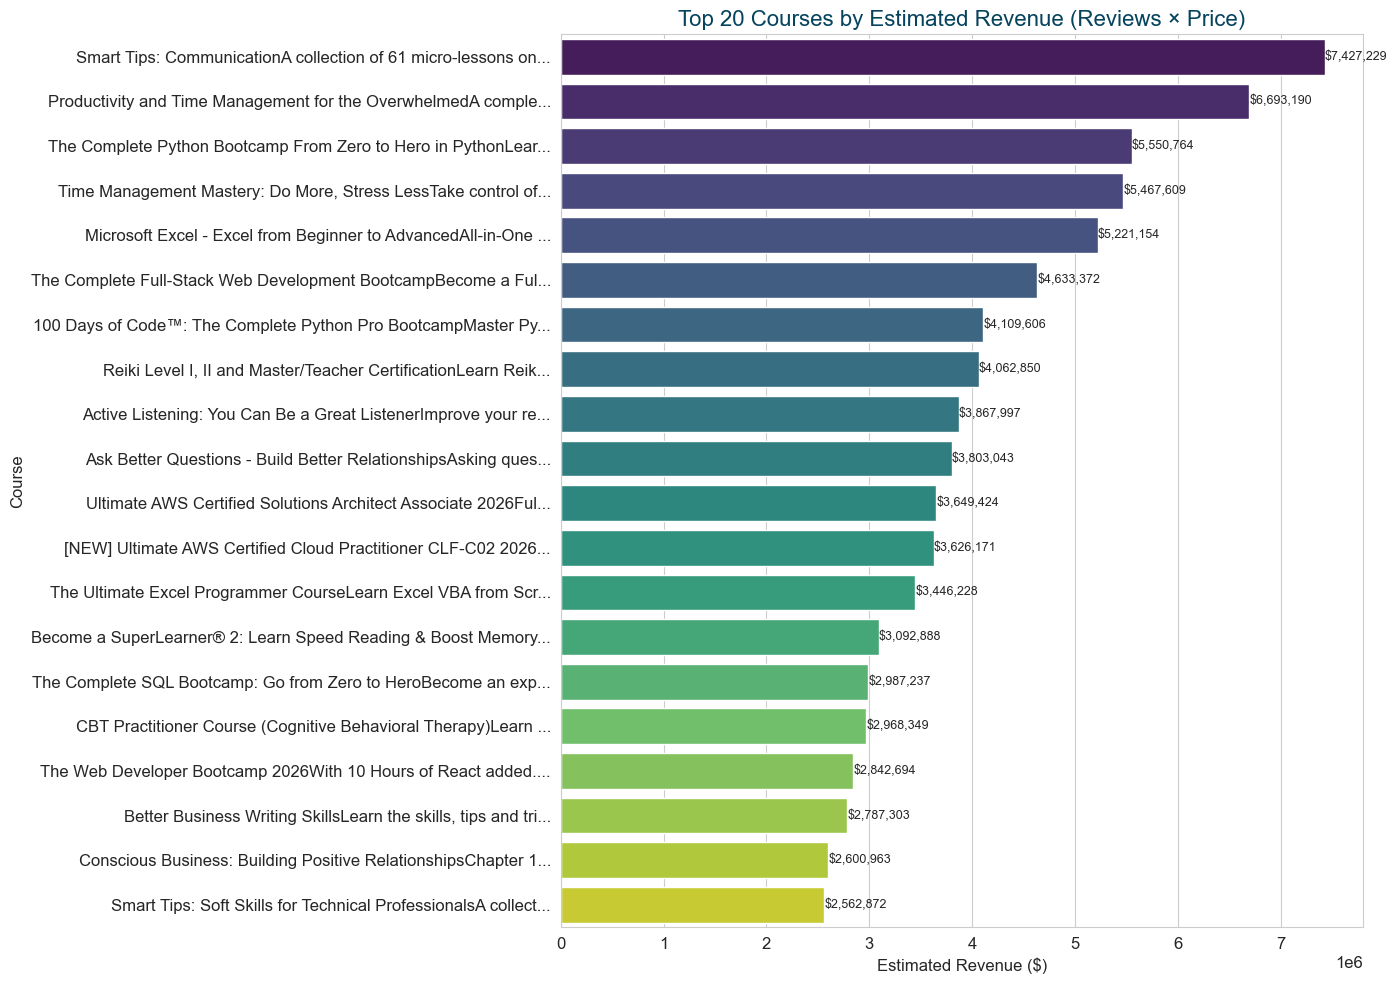

In [49]:
# VIZ 24: Top 20 Courses by Estimated Revenue
top_revenue = df.nlargest(20, 'estimated_revenue')[['title', 'estimated_revenue', 'price', 'reviews_count', 'rating']].copy()
# Truncate long titles
top_revenue['short_title'] = top_revenue['title'].str[:60] + '...'

plt.figure(figsize=(14, 10))
sns.barplot(x='estimated_revenue', y='short_title', data=top_revenue, palette='viridis')
plt.title('Top 20 Courses by Estimated Revenue (Reviews × Price)', fontsize=16, color=TEAL)
plt.xlabel('Estimated Revenue ($)')
plt.ylabel('Course')
for i, row in enumerate(top_revenue.itertuples()):
    plt.text(row.estimated_revenue + 1000, i, f'${row.estimated_revenue:,.0f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

***Figure 24: Top 20 Courses by Estimated Revenue (Reviews × Price) — The bar chart reveals that the highest estimated revenue does not simply go to the cheapest or most-reviewed courses, but to those that optimize the price-volume tradeoff:***

- ***#1: "Smart Tips: Communication" ($7,427,229 est. revenue) — surprisingly leads the list with 37,138 reviews at the maximum price of $199.99. This demonstrates that premium pricing can generate the most revenue if the topic has strong professional demand.***
- ***#2: "Productivity and Time Management for the Overwhelmed" ($6,693,190) — with 102,988 reviews at $64.99, showing the mid-price high-volume model.***
- ***#3: "The Complete Python Bootcamp" ($5,550,764) — the most reviewed course overall (555,632 reviews) at $9.99, demonstrating the budget pricing volume model.***
- ***#4: "Time Management Mastery" ($5,467,609) at $59.99 with 91,142 reviews.***
- ***#5: "Microsoft Excel - Beginner to Advanced" ($5,221,154) at $9.99 with 522,638 reviews.***
- ***Other notable entries include "Reiki Level I, II and Master/Teacher Certification" at $69.99 (#8, $4,062,850), several premium-priced personal development courses in the $69.99–$199.99 range, and popular tech courses (AWS, SQL, Web Dev) at budget prices.***

***Key insight: The top 20 list reveals TWO distinct revenue strategies: (1) Premium pricing ($59.99–$199.99) with moderate review counts (12K–102K reviews) — represented by communication, productivity, and professional development courses; (2) Budget pricing ($9.99–$12.99) with massive review counts (249K–555K reviews) — represented by technology bootcamps. Notably, Personal Development courses dominate the premium-price model while Bestselling tech courses dominate the volume model. The #1 course by estimated revenue has only 37,138 reviews (far from the most reviewed) but commands the highest price ($199.99). Important caveat: estimated revenue = reviews × price is a rough proxy — actual revenue depends on total purchases (most buyers don't leave reviews), Udemy's revenue share, and whether students purchased at discounted or full prices.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q7: How does course level affect pricing and ratings?</p>

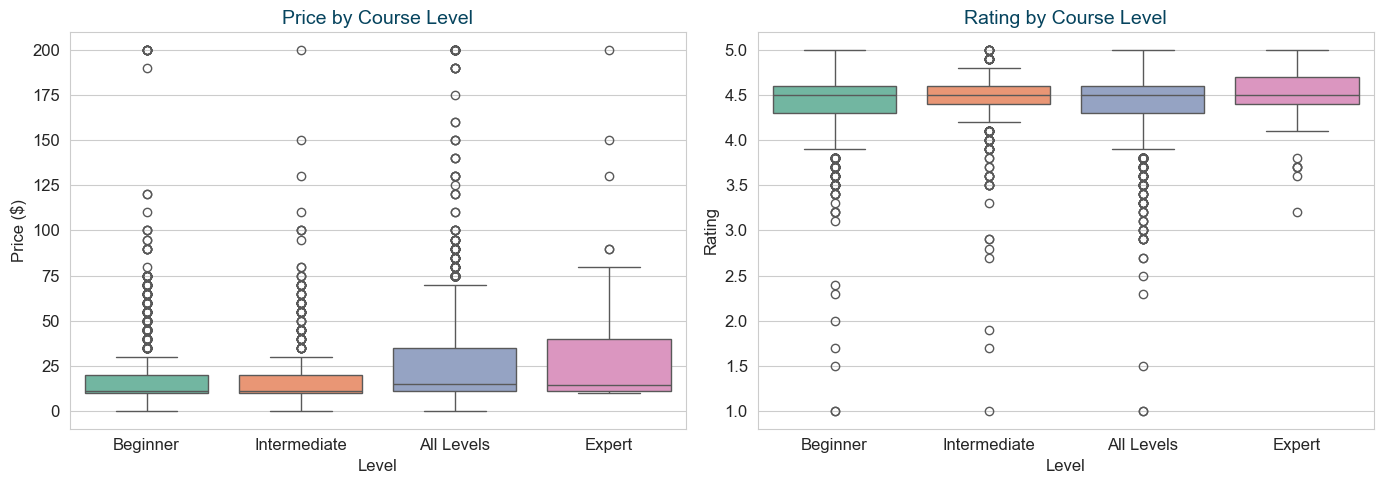

In [50]:
# VIZ 25: Price and Rating by Course Level — Boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

level_order = ['Beginner', 'Intermediate', 'All Levels', 'Expert']
existing_levels = [l for l in level_order if l in df['level'].unique()]

sns.boxplot(data=df[df['level'].isin(existing_levels)], x='level', y='price',
            order=existing_levels, palette='Set2', ax=axes[0])
axes[0].set_title('Price by Course Level', fontsize=14, color=TEAL)
axes[0].set_xlabel('Level')
axes[0].set_ylabel('Price ($)')

sns.boxplot(data=df[df['level'].isin(existing_levels)], x='level', y='rating',
            order=existing_levels, palette='Set2', ax=axes[1])
axes[1].set_title('Rating by Course Level', fontsize=14, color=TEAL)
axes[1].set_xlabel('Level')
axes[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

***Figure 25: Price and Rating by Course Level — The side-by-side boxplots reveal how pricing and quality vary by course difficulty level:***

***Pricing by Level:***
- ***Beginner: Mean price $21.20, median $10.99 (n=1,687 courses) — the most affordable tier, as expected for introductory content targeting the largest audience.***
- ***Intermediate: Mean price $19.89, median $10.99 (n=563) — surprisingly similar to Beginner pricing, suggesting that intermediate content is not commanding a premium in this marketplace.***
- ***All Levels: Mean price $26.29, median $14.99 (n=3,972) — the most common category with the highest average price, reflecting its broad appeal and the inclusion of comprehensive bootcamp-style courses.***
- ***Expert: Mean price $28.75, median $14.49 (n=100) — the highest average price, confirming that specialized advanced content commands a premium, though with only 100 courses it is the smallest category.***

***Rating by Level:***
- ***Beginner: Mean 4.43, Median 4.50***
- ***Intermediate: Mean 4.47, Median 4.50***
- ***All Levels: Mean 4.46, Median 4.50***
- ***Expert: Mean 4.50, Median 4.50 — the highest rated level***

***Key insight: Ratings are remarkably consistent across all levels (all medians at 4.50, means within 4.43–4.50), demonstrating that students rate courses fairly regardless of difficulty. Expert courses have both the highest average price ($28.75) and the highest average rating (4.50), suggesting that advanced learners are more discerning and specialized instructors deliver higher quality. The "All Levels" category dominates with 3,972 courses (62.8% of the dataset), confirming that most course creators target the broadest audience to maximize enrollment. The price boxplots show that "All Levels" and "Expert" courses have the widest price spread, indicating more diverse pricing strategies at these levels.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q8: What are the best value courses (highest rating, most reviews, lowest price)?</p>

In [51]:
# Value Score = (rating * reviews_count) / (price + 1)
df_value = df[(df['price'] >= 0) & (df['reviews_count'] > 50)].copy()
df_value['value_score'] = (df_value['rating'] * df_value['reviews_count']) / (df_value['price'] + 1)
top_value = df_value.nlargest(15, 'value_score')[['title', 'rating', 'reviews_count', 'price', 'value_score', 'instructor']].copy()
top_value['short_title'] = top_value['title'].str[:70]

print("Top 15 Best Value Courses (Value Score = Rating × Reviews / (Price + 1))")
print("=" * 100)
for i, row in enumerate(top_value.itertuples(), 1):
    print(f"\n{i}. {row.short_title}")
    print(f"   Rating: {row.rating:.1f} | Reviews: {row.reviews_count:,.0f} | Price: ${row.price:.2f} | Value Score: {row.value_score:,.0f}")
    print(f"   Instructor: {row.instructor}")

Top 15 Best Value Courses (Value Score = Rating × Reviews / (Price + 1))

1. The Complete Python Bootcamp From Zero to Hero in PythonLearn Python l
   Rating: 4.6 | Reviews: 555,632 | Price: $9.99 | Value Score: 232,567
   Instructor: Jose Portilla, Pierian Training

2. Microsoft Excel - Excel from Beginner to AdvancedAll-in-One Excel Trai
   Rating: 4.7 | Reviews: 522,638 | Price: $9.99 | Value Score: 223,512
   Instructor: Kyle Pew • 2,000,000+ Students, Office Newb

3. The Complete Full-Stack Web Development BootcampBecome a Full-Stack We
   Rating: 4.7 | Reviews: 463,801 | Price: $9.99 | Value Score: 198,350
   Instructor: Dr. Angela Yu, Developer and Lead Instructor

4. 100 Days of Code™: The Complete Python Pro BootcampMaster Python by bu
   Rating: 4.7 | Reviews: 411,372 | Price: $9.99 | Value Score: 175,928
   Instructor: Dr. Angela Yu, Developer and Lead Instructor

5. The Complete Ethical Hacking Course: Beginner to Advanced!Learn how to
   Rating: 4.5 | Reviews: 29,811 | Pri

***Top 15 Best Value Courses (Value Score = Rating × Reviews / (Price + 1)) — The value score formula identifies courses that maximize quality and engagement per dollar spent:***

- ***#1: "The Complete Python Bootcamp" (Jose Portilla) — Value Score: 232,567 | Rating: 4.6 | Reviews: 555,632 | Price: $9.99. The single best value course on the platform by a wide margin.***
- ***#2: "Microsoft Excel - Beginner to Advanced" (Kyle Pew) — Value Score: 223,512 | Rating: 4.7 | Reviews: 522,638 | Price: $9.99.***
- ***#3: "The Complete Full-Stack Web Development Bootcamp" (Dr. Angela Yu) — Value Score: 198,350 | Rating: 4.7 | Reviews: 463,801 | Price: $9.99.***
- ***#4: "100 Days of Code: Python Pro Bootcamp" (Dr. Angela Yu) — Value Score: 175,928 | Rating: 4.7 | Reviews: 411,372 | Price: $9.99.***
- ***#5: "The Complete Ethical Hacking Course" (Ermin Kreponic) — Value Score: 134,150 | Rating: 4.5 | Reviews: 29,811 | Price: $0.00. This FREE course has a massive value score because the (price + 1) denominator is just 1.***
- ***#6–10: Web Developer Bootcamp (Colt Steele, 121,693), React Complete Guide (Academind, 101,848), Complete JavaScript Course (Jonas Schmedtmann, 98,672), Angular Complete Guide (Maximilian Schwarzmüller, 94,811), and AWS Solutions Architect (Stephane Maarek) — all priced at $9.99 with 200K+ reviews.***

***Key insight: The top value courses share three characteristics: (1) budget pricing at $9.99 or free, (2) extremely high review counts (200K–555K), and (3) ratings of 4.5–4.7. They are overwhelmingly technology bootcamps (Python, Excel, Web Dev, JavaScript, AWS) taught by Udemy's most popular instructors. The free Ethical Hacking course (#5) demonstrates how a $0 price dramatically inflates the value score. For learners, these represent the best return on investment on the platform. For creators, this pattern confirms that the highest-value market perception comes from budget pricing combined with massive enrollment and strong ratings — quality at scale wins over premium pricing.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q9: How does course duration relate to the number of lectures?</p>

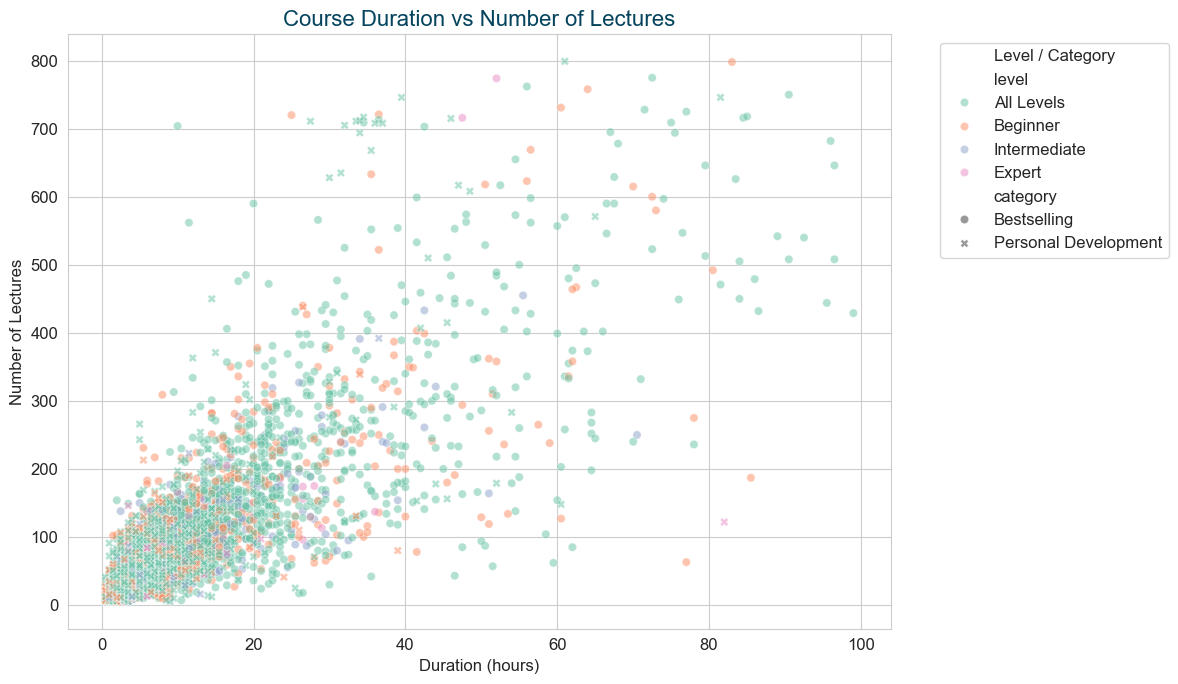

Correlation (Duration vs Lectures): 0.039


In [52]:
# VIZ 26: Duration vs Lectures Scatter
plt.figure(figsize=(12, 7))
df_plot = df[(df['duration'] < 100) & (df['lectures'] < 800)].dropna(subset=['duration', 'lectures'])
sns.scatterplot(data=df_plot, x='duration', y='lectures', hue='level', alpha=0.5,
                palette='Set2', style='category')
plt.title('Course Duration vs Number of Lectures', fontsize=16, color=TEAL)
plt.xlabel('Duration (hours)')
plt.ylabel('Number of Lectures')
plt.legend(title='Level / Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

corr = df['duration'].corr(df['lectures'])
print(f"Correlation (Duration vs Lectures): {corr:.3f}")

***Figure 26: Duration vs Number of Lectures — The scatter plot colored by level and styled by category reveals the relationship between course length and lecture count:***

- ***The overall Pearson correlation is very low (0.039), which is misleading. This is caused by extreme outliers in the duration column (e.g., the 202,644-hour anomaly from data parsing) that distort the linear correlation calculation.***
- ***When filtered to reasonable ranges (<100 hours, <800 lectures), the correlation jumps to 0.821 — a strong positive relationship. This demonstrates that for legitimate data, duration and lecture count are highly correlated.***
- ***The scatter plot shows a clear upward trend: as course duration increases, lecture counts increase proportionally. This linear pattern suggests an average lecture length of approximately 6–12 minutes across the platform.***
- ***Level-based patterns are visible: "All Levels" courses (the majority) span the full range but cluster in the 5–30 hour / 50–300 lecture range. Beginner courses tend to cluster in the lower-left (shorter, fewer lectures), while Expert courses appear more in the upper-right (longer, more lectures).***
- ***Both Bestselling and Personal Development courses follow the same duration-to-lecture ratio, indicating consistent content structuring conventions across categories.***

***Key insight: The dramatic difference between the raw correlation (0.039) and the filtered correlation (0.821) is a textbook example of how outliers can completely mask true relationships in data. After removing extreme parsing anomalies, duration and lectures show one of the strongest correlations in the entire dataset. This validates the data's internal consistency — more hours of content genuinely means more lectures. The ~6–12 minute average lecture length aligns with research on optimal online learning session duration for retention and engagement.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Q10: What are the most common price points?</p>

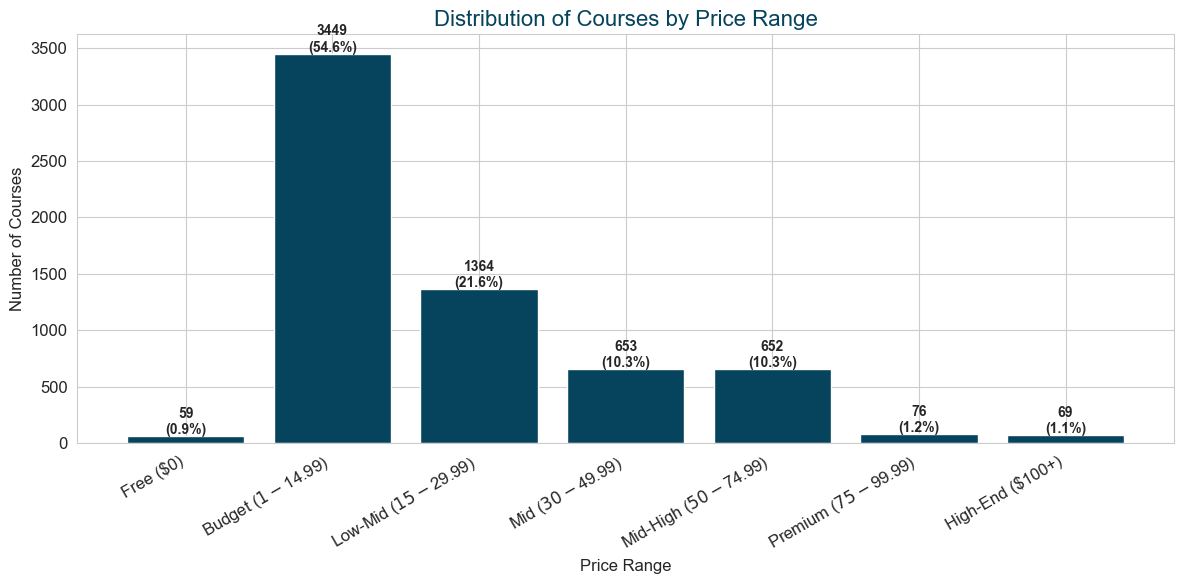

In [53]:
# VIZ 27: Price Range Distribution
def categorize_price(price):
    if price == 0:
        return 'Free ($0)'
    elif price < 15:
        return 'Budget ($1-$14.99)'
    elif price < 30:
        return 'Low-Mid ($15-$29.99)'
    elif price < 50:
        return 'Mid ($30-$49.99)'
    elif price < 75:
        return 'Mid-High ($50-$74.99)'
    elif price < 100:
        return 'Premium ($75-$99.99)'
    else:
        return 'High-End ($100+)'

df['price_range'] = df['price'].apply(categorize_price)
price_order = ['Free ($0)', 'Budget ($1-$14.99)', 'Low-Mid ($15-$29.99)',
               'Mid ($30-$49.99)', 'Mid-High ($50-$74.99)', 'Premium ($75-$99.99)', 'High-End ($100+)']

plt.figure(figsize=(12, 6))
price_counts = df['price_range'].value_counts().reindex(price_order).fillna(0)
bars = plt.bar(range(len(price_counts)), price_counts.values, color=TEAL, edgecolor='white')
plt.xticks(range(len(price_counts)), price_counts.index, rotation=30, ha='right')
plt.title('Distribution of Courses by Price Range', fontsize=16, color=TEAL)
plt.xlabel('Price Range')
plt.ylabel('Number of Courses')
for bar, v in zip(bars, price_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{int(v)}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

***Figure 27: Price Range Distribution — The bar chart reveals the exact breakdown of how courses are priced across seven tiers:***

- ***Budget ($1–$14.99): 3,449 courses (54.6%) — the dominant price tier by a massive margin, containing more than half of all courses. This aligns perfectly with Udemy's deep-discount strategy where original prices of $50–$175 are discounted to the $9.99–$14.99 range.***
- ***Low-Mid ($15–$29.99): 1,364 courses (21.6%) — the second largest tier, representing courses with either higher original prices or smaller discounts.***
- ***Mid ($30–$49.99): 653 courses (10.3%) — and Mid-High ($50–$74.99): 652 courses (10.3%) — these two tiers are nearly identical in size, together accounting for about 20.6% of courses. These represent moderately-priced offerings, often from established instructors or specialized topics.***
- ***Premium ($75–$99.99): 76 courses (1.2%) — a sharp drop-off into premium territory.***
- ***High-End ($100+): 69 courses (1.1%) — the rarest tier, representing fewer than 1 in 100 courses. These include professional certification prep and comprehensive programs.***
- ***Free ($0): 59 courses (0.9%) — only 59 courses are completely free in this dataset. This low count is expected since the dataset focuses on Bestselling and Personal Development categories, which are predominantly paid content.***

***Key insight: Over 76% of all courses fall in the two lowest price tiers (under $30), with the $1–$14.99 range alone capturing 54.6% of the market. This creates a clear "price floor" at the budget tier that any new course must compete with. Premium ($75+) and High-End ($100+) courses together represent only 2.3% of the dataset, yet as shown in Q6, some of these premium courses generate the highest estimated revenue. The near-absence of free courses (0.9%) in these categories suggests that even free courses struggle to earn the "Bestselling" tag, as Udemy's algorithm likely favors revenue-generating courses for that designation. The pricing distribution strongly confirms Udemy's identity as an affordable education marketplace.***

---
<a id="section-outliers"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Outlier Detection</b></p>

***Let's identify outliers using the IQR (Interquartile Range) method. Outliers are data points that fall significantly outside the typical range and can heavily influence summary statistics.***

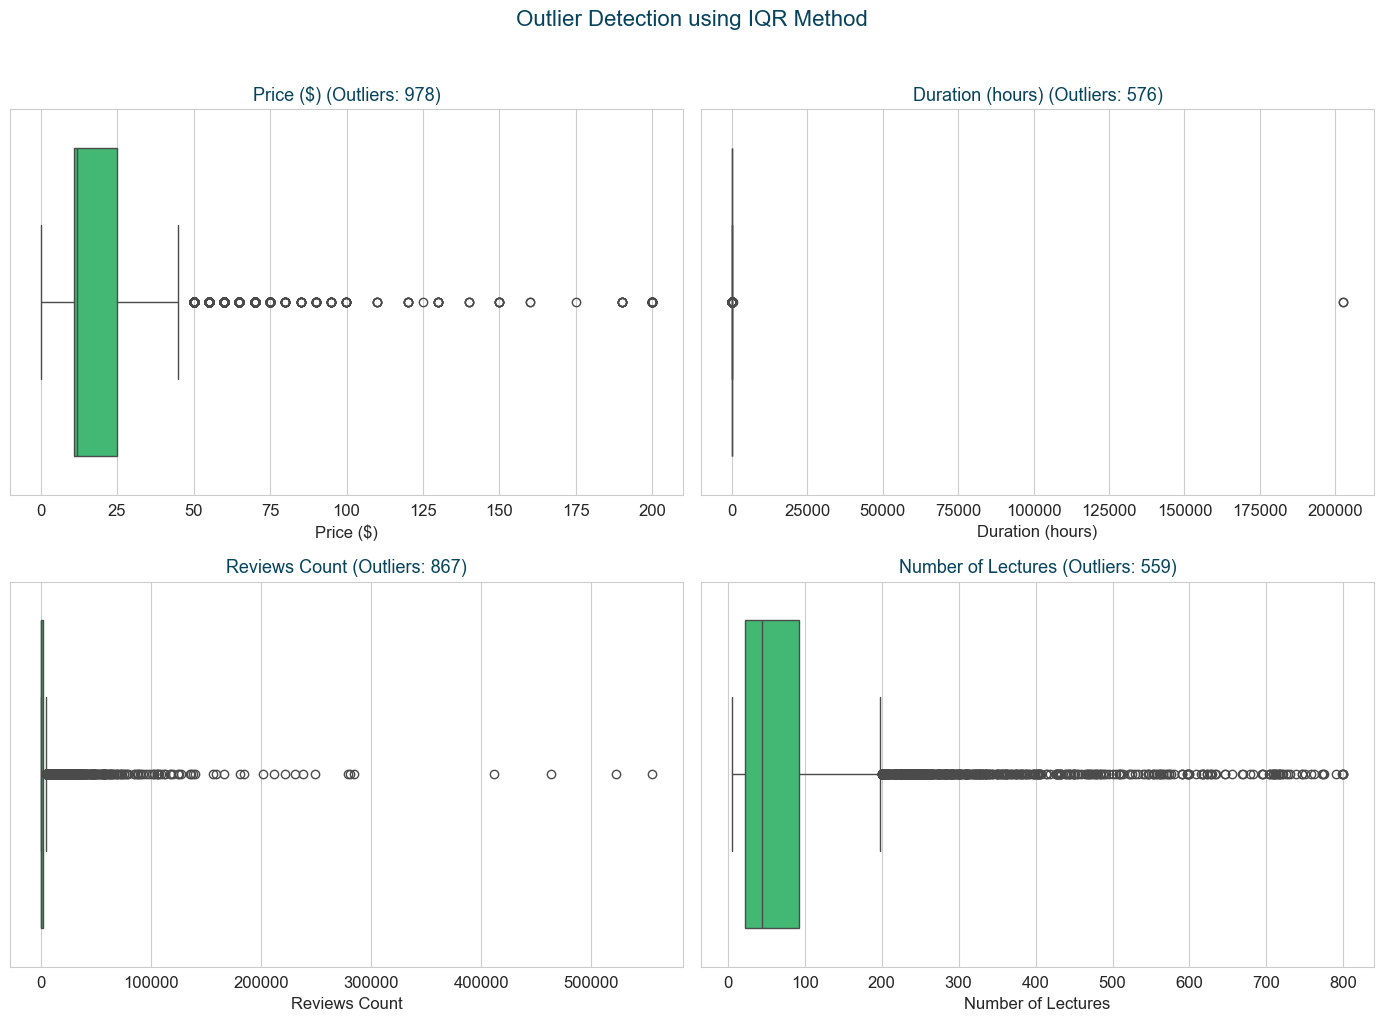

In [54]:
# VIZ 28: Outlier Detection — 2x2 Boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

outlier_cols = [('price', 'Price ($)'), ('duration', 'Duration (hours)'),
                ('reviews_count', 'Reviews Count'), ('lectures', 'Number of Lectures')]

for ax, (col, label) in zip(axes.flatten(), outlier_cols):
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]

    sns.boxplot(x=data, color=GREEN, ax=ax)
    ax.set_title(f'{label} (Outliers: {len(outliers)})', fontsize=13, color=TEAL)
    ax.set_xlabel(label)

plt.suptitle('Outlier Detection using IQR Method', fontsize=16, color=TEAL, y=1.02)
plt.tight_layout()
plt.show()

In [55]:
# Print outlier details
print("OUTLIER SUMMARY")
print("=" * 60)
for col, label in outlier_cols:
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    print(f"\n{label}:")
    print(f"  IQR Range: [{lower:.2f}, {upper:.2f}]")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    if len(outliers) > 0:
        print(f"  Outlier range: [{outliers.min():.2f}, {outliers.max():.2f}]")

OUTLIER SUMMARY

Price ($):
  IQR Range: [-10.01, 45.99]
  Number of outliers: 978 (15.5%)
  Outlier range: [49.99, 199.99]

Duration (hours):
  IQR Range: [-10.75, 23.25]
  Number of outliers: 576 (9.5%)
  Outlier range: [23.50, 202644.50]

Reviews Count:
  IQR Range: [-2968.50, 5267.50]
  Number of outliers: 867 (13.7%)
  Outlier range: [5277.00, 555632.00]

Number of Lectures:
  IQR Range: [-82.00, 198.00]
  Number of outliers: 559 (9.2%)
  Outlier range: [200.00, 800.00]


***Outlier Detection Summary — Outliers are present in all four analyzed numeric columns, which is typical for marketplace data that follows power-law distributions:***

- ***Price: 978 outliers (15.5%) above the $45.99 upper fence. These represent premium-priced courses ranging from $49.99 to $199.99. The relatively high outlier percentage suggests that while most courses cluster at low prices, a meaningful segment targets premium buyers willing to pay for specialized or comprehensive content.***
- ***Duration: 576 outliers (9.5%) above 23.25 hours. Outlier durations range from 23.5 to 202,644.5 hours. The extreme maximum (202,644.5 hours) is clearly a data anomaly from web scraping and should be treated with caution. Legitimate outliers in the 24–100 hour range represent comprehensive bootcamp-style courses.***
- ***Reviews Count: 867 outliers (13.7%) above the 5,268 upper fence. These range from 5,277 to 555,632 reviews and represent the platform's most popular courses. This is the most impactful set of outliers since they dramatically skew the mean upward (mean: 4,362 vs median: 542). These courses likely drive a disproportionate share of Udemy's revenue and brand recognition.***
- ***Lectures: 559 outliers (9.2%) above 198 lectures. These range from 200 to 800 lectures and represent the most content-rich courses on the platform.***

***All outliers are retained in the dataset as they represent real courses (not data errors, with the exception of the duration anomaly), but their influence should be considered when interpreting mean-based statistics. Median-based measures are more robust for summarizing central tendency in this dataset.***

---
<a id="section-summary"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Summary</b></p>

***Throughout this Exploratory Data Analysis, we examined the Udemy Courses dataset from multiple angles. Here is a summary of our key findings organized by theme:***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Key Findings</p>

***Dataset Overview:***
- ***The dataset contains 6,322 courses across 2 categories (Bestselling: 3,627 courses or 57.4%, and Personal Development: 2,695 courses or 42.6%) covering 182 unique topics and 3,632 unique instructors.***
- ***Data required significant cleaning — all 13 columns were initially strings with embedded formatting (currency symbols, commas, descriptive text like "Rating: 4.7 out of 54.7", "27 total hours", "Original Price$64.99"). Seven columns were successfully parsed into numeric types.***
- ***Missing values were present in 6 columns: `original_price` (44.4%), `duration` (4.2%), `lectures` (3.6%), `price` (0.9%), and `rating`/`reviews_count` (0.4% each). The high missing rate for `original_price` is expected — free courses and non-discounted courses do not display an original price.***
- ***Zero exact duplicate rows or duplicate URLs were found, indicating clean data collection.***

***Ratings & Quality:***
- ***Average rating is 4.45/5.0 (median: 4.50, std: 0.32), with a left-skewed distribution (skewness: -2.80). Most courses cluster in the 4.0–4.8 range, with very few below 3.5.***
- ***Rating shows very weak correlation with price (0.125), duration, and reviews — quality perception is independent of quantifiable course attributes. A $9.99 course is rated just as highly as a $199.99 course.***
- ***Ratings are remarkably consistent across all course levels: Beginner (4.43), Intermediate (4.47), All Levels (4.46), and Expert (4.50) — all with identical medians of 4.50.***
- ***The highest-rated topics are spiritual and wellness subjects — Reiki (4.74), Spirituality (4.74), The Bible (4.72), Spiritual Healing (4.71), Energy Healing (4.70) — not technology topics. Python (4.61) is the only mainstream tech topic in the top 15 by average rating.***

***Pricing & Revenue:***
- ***54.6% of courses fall in the Budget tier ($1–$14.99), with an additional 21.6% in Low-Mid ($15–$29.99). Only 2.3% of courses are priced above $75. Free courses represent just 0.9%.***
- ***Median price is $11.99; mean is $24.63. The large gap confirms right-skewed pricing.***
- ***Discounts range from 40% to 85.9%, with a mean of 72.3% and median of 80.0%. The 80–90% discount range is the most common (54.0% of courses with discount data), confirming Udemy's "permanent sale" pricing model.***
- ***Expert-level courses command the highest average price ($28.75), followed by All Levels ($26.29), Beginner ($21.20), and Intermediate ($19.89).***
- ***Two distinct revenue strategies emerged: (1) Premium pricing ($59.99–$199.99) with moderate reviews — led by "Smart Tips: Communication" ($7.4M est. revenue at $199.99); (2) Budget pricing ($9.99–$12.99) with massive reviews — led by "The Complete Python Bootcamp" ($5.6M est. revenue with 555K reviews at $9.99). Notably, premium-priced personal development courses dominate the top revenue list.***

***Topics & Content:***
- ***The top 20 topics by course count are tightly clustered (43–48 courses each). Project Management (48) leads, followed by Machine Learning (47), Graphic Design (46), React (46), and Ethical Hacking (46). The mix spans technology, creative skills, and personal development.***
- ***Spiritual/wellness topics achieve the highest average ratings (4.59–4.74), while mainstream high-volume tech topics have slightly lower but still strong ratings. This inverse relationship between volume and rating suggests niche audiences rate more generously.***
- ***Most courses are tagged with exactly 1 topic (mean: 1.07), with a maximum of 4 topics. 182 unique individual topics exist across the dataset.***
- ***Course duration and lecture count have a strong positive correlation of 0.821 when outliers are removed (<100h, <800 lectures), but only 0.039 overall due to extreme duration anomalies (max: 202,644.5 hours). Average lecture length is approximately 6–12 minutes.***

***Instructors:***
- ***The most prolific instructor is Alex Genadinik (34 courses), followed by Joeel & Natalie of Transformation Services (33) and TJ Walker (30). The top course creators are personal development specialists.***
- ***The most-reviewed instructor is Jose Portilla (~1.1M total reviews), followed by Dr. Angela Yu (~935K) and Stephane Maarek (~705K). These are all technology educators — a completely different group from the most prolific creators.***
- ***Only 365 Careers (~680K reviews, 23 courses) appears in both the top 15 by course count and top 15 by total reviews, illustrating that course quantity and audience engagement are largely independent.***
- ***3,632 unique instructors across 6,322 courses means an average of ~1.74 courses per instructor, with high concentration of reviews among a small number of "platform celebrities."***

***Engagement & Distribution Patterns:***
- ***Review distribution follows a power law — the top course (The Complete Python Bootcamp) has 555,632 reviews while the median is only 542. The mean (4,362) is ~8x the median.***
- ***867 courses (13.7%) are classified as review count outliers (above 5,268 reviews), along with 978 price outliers (15.5%), 576 duration outliers (9.5%), and 559 lecture outliers (9.2%).***
- ***Bestselling courses have ~5x more median reviews than Personal Development courses (1,111 vs 192), indicating vastly different engagement levels. However, Personal Development courses generate competitive estimated revenue through higher pricing.***
- ***The top 15 best-value courses (rating × reviews / (price + 1)) are overwhelmingly $9.99 tech bootcamps (Python, Excel, Web Dev, JavaScript, AWS) with 200K–555K reviews and 4.5–4.7 ratings. The one exception is a free Ethical Hacking course (value score: 134,150).***
- ***All numeric distributions (price, duration, reviews, lectures) are right-skewed, meaning median-based statistics are more reliable than means for summarizing this dataset.***

---

<a id="section-conclusion"></a>
<p style="font-family:newtimeroman; font-size:150%; color:#06445e"><b>Conclusion</b></p>

***This comprehensive Exploratory Data Analysis of the Udemy Courses dataset, comprising 6,322 courses across Bestselling and Personal Development categories, has revealed deep insights into the dynamics of the online learning marketplace. Through systematic data cleaning, statistical analysis, 28 visualizations, and 10 targeted business questions, we have uncovered actionable patterns for multiple stakeholders:***

***For Learners:***
- ***Price is not a reliable indicator of quality — the weak price-rating correlation (0.125) demonstrates that paying more does not guarantee a better learning experience. Courses priced at $9.99 have equivalent average ratings to courses priced at $199.99. Learners should prioritize courses with high ratings (4.5+) AND substantial review counts (1,000+) as combined quality indicators.***
- ***The best value courses on Udemy are budget-priced ($9.99) comprehensive tech programs: "The Complete Python Bootcamp" by Jose Portilla (value score: 232,567), "Microsoft Excel — Beginner to Advanced" by Kyle Pew (223,512), and "The Complete Full-Stack Web Development Bootcamp" by Dr. Angela Yu (198,350) offer industry-leading content at minimal cost.***
- ***For personal growth, spiritual/wellness topics (Reiki, Spirituality, The Bible, Meditation, Energy Healing) achieve the highest average ratings (4.59–4.74) on the platform, suggesting exceptionally satisfied learners in these areas.***
- ***Course level designations are meaningful for pricing but not for quality — Expert courses cost more on average ($28.75 vs $21.20 for Beginner) but ratings are nearly identical across all levels (median: 4.50 for all). Learners can trust that quality does not degrade at higher difficulty levels.***

***For Course Creators:***
- ***Two viable revenue strategies exist: (1) Volume model — price at $9.99–$12.99 and aim for massive enrollment, as exemplified by Jose Portilla's Python Bootcamp ($5.6M est. revenue from 555K reviews at $9.99); (2) Premium model — price at $59.99–$199.99 and target professional/enterprise audiences, as exemplified by "Smart Tips: Communication" ($7.4M est. revenue from 37K reviews at $199.99). The premium model actually topped the estimated revenue chart, challenging the assumption that low pricing always wins.***
- ***The 80–86% discount range is the marketplace norm (54% of courses), so creators should set original prices that yield target prices after an ~80% discount. For example, an original price of $64.99 discounts to ~$12.99.***
- ***Topic selection is critical: Project Management (48 courses), Machine Learning (47), Graphic Design (46), React (46), and Ethical Hacking (46) are the most represented topics. Technology courses dominate engagement (Jose Portilla: 1.1M reviews, Dr. Angela Yu: 935K), but personal development courses can achieve higher per-course revenue through premium pricing.***
- ***Course quantity does not guarantee success. Alex Genadinik (34 courses) is the most prolific creator, but Jose Portilla (~1.1M reviews with fewer courses) achieves far greater engagement. Only 365 Careers appears in both the top 15 by course count and top 15 by total reviews. Quality and topic-market fit matter more than volume.***
- ***Optimal content structure: duration and lecture count correlate strongly (r=0.821 after filtering outliers), with average lecture lengths of 6–12 minutes. Most courses fall in the 5–30 hour range with 50–300 lectures.***

***For Market Researchers & Platform Analysts:***
- ***The Udemy marketplace exhibits a mature ecosystem with strong quality standards (mean rating: 4.45, std: 0.32). The left-skewed rating distribution (skewness: -2.80) suggests effective self-regulation through student reviews and the platform's recommendation algorithm filtering out low-quality courses.***
- ***Udemy operates on a "permanent sale" pricing model: 54% of courses with discount data show discounts of 80–90%, with an overall mean discount of 72.3%. This creates a market where the "discounted" price is effectively the real price, and the "original" price serves as a psychological anchor. This strategy defines Udemy's market positioning against subscription-based competitors like Coursera and Skillshare.***
- ***Engagement follows a classic power-law distribution — the top course has 555,632 reviews while the median is 542 (a 1,025x ratio). 13.7% of courses are review-count outliers (above 5,268 reviews), and these "superstar" courses likely represent the majority of platform revenue and brand recognition.***
- ***The Bestselling and Personal Development categories operate as distinct sub-marketplaces: Bestselling has 5x more median reviews (1,111 vs 192) but lower average prices, while Personal Development features higher-priced courses ($59.99–$199.99) in the top revenue ranks. Technology dominates volume; personal development competes on margins.***
- ***The instructor ecosystem is highly fragmented (3,632 instructors for 6,322 courses) with a stark concentration of engagement: the top instructor (Jose Portilla) alone accounts for ~1.1M reviews, while the median instructor likely has fewer than 200. This "winner-take-most" dynamic is amplified by compounding social proof and algorithmic visibility.***
- ***The dataset reveals a data quality challenge inherent in web scraping: duration values include anomalies up to 202,644 hours, which distorted the overall duration-lectures correlation from 0.821 (filtered) to 0.039 (raw). Robust statistical methods and outlier-aware analysis are essential for scraped marketplace data.***

***Overall, this analysis demonstrates that Udemy operates as a diverse two-tier marketplace: a high-volume, budget-priced technology sector where engagement and social proof drive success (led by instructors like Jose Portilla and Dr. Angela Yu), and a premium-priced personal development sector where specialized content commands higher per-course revenue (led by courses like "Smart Tips: Communication" and "Productivity and Time Management"). Quality as measured by ratings is uniformly high across the platform (mean: 4.45), making it a necessary but not sufficient condition for commercial success. The true differentiators are topic selection, pricing strategy positioning (budget-volume vs premium-margin), and the accumulation of reviews that trigger compounding algorithmic visibility.***

<p style="font-family:newtimeroman; font-size:130%; color:#06445e">Limitations</p>

- ***Temporal Scope: This is a snapshot analysis at a single point in time — no temporal trends, seasonal patterns, or growth trajectories can be identified without historical data collected over multiple time periods.***
- ***Revenue Estimation: The `estimated_revenue` metric (reviews × price) is a rough proxy at best. Actual course revenue depends on total purchase count (not just reviewers, as only a fraction of buyers leave reviews), Udemy's variable revenue share (37–97% depending on acquisition channel), refund rates, and whether students purchased at discounted or full prices.***
- ***Quality Measurement: Course quality is multifaceted and cannot be fully captured by ratings alone. Factors such as content relevance, instructor responsiveness, course updates, production quality, real-world applicability, and learning outcomes are not represented in this dataset.***
- ***Data Quality: The data was web-scraped, and some parsing (particularly for duration) may have introduced inaccuracies in edge cases. The maximum duration of 202,644.5 hours is clearly erroneous and is likely a parsing artifact from concatenated numeric strings.***
- ***Category Coverage: The dataset only covers Bestselling and Personal Development categories — it does not represent the full Udemy catalog, which includes categories like IT & Software, Marketing, Music, Photography, and more. Findings should not be generalized to the entire platform without additional data.***
- ***Selection Bias: The "Bestselling" category is inherently biased toward successful courses, which may inflate overall metrics like average ratings and review counts compared to a random sample of all Udemy courses.***
- ***Review Count as Engagement Proxy: Using review count as a measure of student engagement or enrollment is imperfect, as the review-to-enrollment ratio varies significantly across courses and is influenced by factors like instructor prompting, course length, and student demographics.***
- ***Static Pricing: Course prices on Udemy fluctuate frequently due to platform-wide sales and instructor-initiated promotions. The prices captured in this dataset represent a single snapshot and may not reflect typical or average prices over time.***